# Predicting March Madness

## Import Libraries

In [2]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [3]:
df_school = pd.read_csv("./school_records.csv")
df_game = pd.read_csv("./game_records.csv")

In [4]:
df_school.shape

(3125, 21)

In [5]:
df_game.shape

(47038, 6)

In [6]:
df_school.head(75)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2010.0,Air Force,20.387097,10.741935,5.677419,7.096774,27.222685,12.548387,5.000000,1.645161,...,17.645161,57.193548,63.129032,0.443,0.313,0.635,0.323,0.062500,-4.90,3.13
1,2010.0,Akron,25.057143,13.800000,6.714286,13.342857,35.875918,13.514286,6.085714,3.257143,...,19.485714,70.628571,65.514286,0.433,0.339,0.657,0.686,0.750000,2.82,-1.50
2,2010.0,Alabama A&M,22.185185,17.481481,4.000000,13.925926,36.669410,10.666667,9.222222,5.296296,...,20.370370,65.851852,69.666667,0.382,0.291,0.635,0.407,0.444444,-20.19,-13.71
3,2010.0,Alabama-Birmingham,22.441176,16.852941,5.205882,12.352941,36.342561,11.470588,6.558824,2.676471,...,17.970588,66.941176,60.382353,0.422,0.311,0.694,0.735,0.687500,9.46,2.90
4,2010.0,Alabama State,21.516129,15.290323,6.129032,12.903226,35.099896,12.903226,7.354839,4.161290,...,20.451613,64.451613,65.903226,0.404,0.324,0.641,0.516,0.666667,-14.41,-12.02
5,2010.0,Alabama,24.718750,13.593750,5.468750,12.062500,34.810547,13.406250,7.781250,3.968750,...,18.218750,68.500000,64.781250,0.441,0.350,0.707,0.531,0.375000,10.34,6.62
6,2010.0,Albany (NY),22.187500,12.281250,6.062500,12.468750,35.735352,11.875000,5.843750,3.031250,...,18.812500,62.718750,69.125000,0.409,0.332,0.721,0.219,0.125000,-11.94,-5.53
7,2010.0,Alcorn State,21.000000,14.290323,4.354839,11.483871,33.984391,8.677419,6.903226,3.161290,...,21.612903,60.645161,82.000000,0.379,0.309,0.611,0.065,0.111111,-30.36,-9.00
8,2010.0,American,21.967742,12.741935,5.935484,9.806452,35.070760,14.419355,3.516129,2.612903,...,19.032258,62.612903,67.193548,0.425,0.345,0.692,0.355,0.500000,-11.47,-6.89
9,2010.0,Appalachian State,25.783784,15.648649,7.540541,11.108108,38.186267,12.081081,5.432432,2.756757,...,17.621622,74.756757,69.378378,0.476,0.397,0.738,0.649,0.722222,1.80,-2.76


In [7]:
df_game.head(40)

,year,team_1_name,team_1_score,team_2_name,team_2_score,date_string
0,2010,Arkansas-Pine Bluff,61.0,Winthrop,44.0,Mar16
1,2010,Arkansas-Pine Bluff,44.0,Duke,73.0,Mar19
2,2010,Baylor,68.0,Sam Houston State,59.0,Mar18
3,2010,Baylor,76.0,Old Dominion,68.0,Mar20
4,2010,Baylor,72.0,Saint Mary's (CA),49.0,Mar26
5,2010,Baylor,71.0,Duke,78.0,Mar28
6,2010,Brigham Young,99.0,Florida,92.0,Mar18
7,2010,Brigham Young,72.0,Kansas State,84.0,Mar20
8,2010,Butler,77.0,Texas-El Paso,59.0,Mar18
9,2010,Butler,54.0,Murray State,52.0,Mar20


In [8]:
df_school.tail()

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
3120,2018.0,Wright State,25.117647,15.058824,6.852941,10.176471,36.024221,13.264706,6.647059,2.205882,...,15.911765,72.147059,65.705882,0.436,0.342,0.717,0.735,0.777778,0.78,-4.38
3121,2018.0,Wyoming,26.454545,17.666667,9.212121,7.000000,34.575758,15.696970,6.515152,3.939394,...,19.818182,79.787879,78.696970,0.446,0.345,0.738,0.606,0.555556,4.61,3.89
3122,2018.0,Xavier,28.878788,18.696970,7.818182,9.757576,38.098255,16.636364,5.848485,2.939394,...,16.909091,84.272727,74.484848,0.491,0.369,0.790,0.848,0.833333,19.69,9.90
3123,2018.0,Yale,27.000000,12.933333,8.233333,8.933333,33.868889,16.700000,6.433333,3.033333,...,17.633333,75.166667,73.600000,0.468,0.335,0.721,0.533,0.642857,-3.37,-2.75
3124,2018.0,Youngstown State,28.187500,11.593750,7.343750,14.281250,35.772461,13.906250,8.312500,3.937500,...,21.000000,75.312500,82.718750,0.427,0.330,0.636,0.250,0.333333,-13.66,-2.56


## Check for null values

In [9]:
df_school.isnull().values.any()

False

In [10]:
df_game.isnull().values.any()

False

In [11]:
df_school[(df_school['year'] == 2011) & (df_school['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
334,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


In [31]:
def resolve_team_name(team_name):
    #Apply hard-coded corrections to team names
    team_name_dict = {'Colorado-Colorado Springs':'Colorado',
                     'Colorado College': 'Colorado'}
    if(team_name in team_name_dict):
        return team_name_dict[team_name]

    return team_name
def get_school_stats(year, team_name):
    return df_school[(df_school['year'] == year) & (df_school['team_name'] == team_name)]
def get_vals(t_stats_list, key):
    ret = []
    for t_stat in t_stats_list:
        ret.append(t_stat[key].squeeze())
    return ret
def get_team_stats_dict_with_t1_win(t1_stats, t2_stats, t1_wins):
    return {'team_name_1':get_vals(t1_stats,'team_name'),'fg_pg_1':get_vals(t1_stats,'fg_pg'),'ft_pg_1':get_vals(t1_stats,'ft_pg'),
            'three_pt_pg_1':get_vals(t1_stats,'three_pt_pg'),'orb_pg_1':get_vals(t1_stats,'orb_pg'),'drb_pg_1':get_vals(t1_stats,'drb_pg'),
            'ast_pg_1':get_vals(t1_stats,'ast_pg'),'stl_pg_1':get_vals(t1_stats,'stl_pg'),'blk_pg_1':get_vals(t1_stats,'blk_pg'),
            'tov_pg_1':get_vals(t1_stats,'tov_pg'),'pf_pg_1':get_vals(t1_stats,'pf_pg'), 'pt_pg_1':get_vals(t1_stats,'pt_pg'),
            'opnt_pt_pg_1':get_vals(t1_stats,'opnt_pt_pg'),'fg_pct_1':get_vals(t1_stats,'fg_pct'),'three_p_pct_1':get_vals(t1_stats,'three_p_pct'),
            'ft_pct_1':get_vals(t1_stats,'ft_pct'),'wl_pct_1':get_vals(t1_stats,'wl_pct'),'conf_wl_pct_1':get_vals(t1_stats,'conf_wl_pct'),
            'srs_1':get_vals(t1_stats,'srs'),'sos_1':get_vals(t1_stats,'sos'),
            'team_name_2':get_vals(t2_stats,'team_name'),'fg_pg_2':get_vals(t2_stats,'fg_pg'),'ft_pg_2':get_vals(t2_stats,'ft_pg'),
            'three_pt_pg_2':get_vals(t2_stats,'three_pt_pg'),'orb_pg_2':get_vals(t2_stats,'orb_pg'),'drb_pg_2':get_vals(t2_stats,'drb_pg'),
            'ast_pg_2':get_vals(t2_stats,'ast_pg'),'stl_pg_2':get_vals(t2_stats,'stl_pg'),'blk_pg_2':get_vals(t2_stats,'blk_pg'),
            'tov_pg_2':get_vals(t2_stats,'tov_pg'),'pf_pg_2':get_vals(t2_stats,'pf_pg'), 'pt_pg_2':get_vals(t2_stats,'pt_pg'),
            'opnt_pt_pg_2':get_vals(t2_stats,'opnt_pt_pg'),'fg_pct_2':get_vals(t2_stats,'fg_pct'),'three_p_pct_2':get_vals(t2_stats,'three_p_pct'),
            'ft_pct_2':get_vals(t2_stats,'ft_pct'),'wl_pct_2':get_vals(t2_stats,'wl_pct'),'conf_wl_pct_2':get_vals(t2_stats,'conf_wl_pct'),
            'srs_2':get_vals(t2_stats,'srs'),'sos_2':get_vals(t2_stats,'sos'),
            't1_win':t1_wins}
def create_team_stats_df(indeces_w_stats, t1_stats_list, t2_stats_list,t1_wins):
    #Assumes all lists are of the same length
    return pd.DataFrame(get_team_stats_dict_with_t1_win(t1_stats_list, t2_stats_list,t1_wins), index = indeces_w_stats)

        
    

In [20]:

indeces_w_stats = []
indeces_wo_stats = []
t1_stats_list = []
t2_stats_list = []
t1_wins_list = []
for index, row in df_game.iterrows():
    year = row['year']
    team_1 = row['team_1_name']
    team_2 = row['team_2_name']
    team_1_score = row['team_1_score']
    team_2_score = row['team_2_score']
    t1_stats = get_school_stats(year, resolve_team_name(team_1))
    t2_stats = get_school_stats(year, resolve_team_name(team_2))

    if(len(t1_stats) > 0 and len(t2_stats) > 0):  
        indeces_w_stats.append(index)
        t1_stats_list.append(t1_stats)
        t2_stats_list.append(t2_stats)
        t1_wins_list.append(team_1_score > team_2_score)
    else:
        indeces_wo_stats.append(index)
        print(year)
        print(team_1)
        print(team_2)
print(len(indeces_w_stats))
        

2010
Arkansas-Pine Bluff
Winthrop
2010
Arkansas-Pine Bluff
Duke
2010
Baylor
Sam Houston State
2010
Baylor
Old Dominion
2010
Baylor
Saint Mary's (CA)
2010
Baylor
Duke
2010
Brigham Young
Florida
2010
Brigham Young
Kansas State
2010
Butler
Texas-El Paso
2010
Butler
Murray State
2010
Butler
Syracuse
2010
Butler
Kansas State
2010
Butler
Michigan State
2010
Butler
Duke
2010
UC-Santa Barbara
Ohio State
2010
University of California
Louisville
2010
University of California
Duke
2010
Clemson
Missouri
2010
Cornell
Temple
2010
Cornell
Wisconsin
2010
Cornell
Kentucky
2010
Duke
Purdue
2010
Duke
West Virginia
2010
East Tennessee State
Kentucky
2010
Florida State
Gonzaga
2010
Georgetown
Ohio
2010
Georgia Tech
Oklahoma State
2010
Georgia Tech
Ohio State
2010
Gonzaga
Syracuse
2010
Houston
Maryland
2010
Kansas State
North Texas
2010
Kansas State
Xavier
2010
Kansas
Lehigh
2010
Kansas
Northern Iowa
2010
Kentucky
Wake Forest
2010
Kentucky
West Virginia
2010
Marquette
Washington
2010
Maryland
Michigan State

2011
Arkansas
Texas A&M
2011
Arkansas
Texas
2011
Arkansas
Tennessee
2011
Arkansas
Florida
2011
Arkansas
Vanderbilt
2011
Arkansas
Georgia
2011
Arkansas
Kentucky
2011
Arkansas
Tennessee
2011
Army
Vassar
2011
Army
Long Island University
2011
Army
Bucknell
2011
Army
Bucknell
2011
Army
Bucknell
2011
Auburn
North Carolina-Asheville
2011
Auburn
Georgia Southwestern
2011
Auburn
Florida State
2011
Auburn
Kentucky
2011
Auburn
Florida
2011
Auburn
Tennessee
2011
Auburn
Georgia
2011
Auburn
Vanderbilt
2011
Auburn
Georgia
2011
Austin Peay
Purdue
2011
Austin Peay
Oakland
2011
Austin Peay
Fontbonne
2011
Austin Peay
Memphis
2011
Austin Peay
Morehead State
2011
Austin Peay
Brescia
2011
Austin Peay
Morehead State
2011
Austin Peay
Morehead State
2011
Ball State
Indiana State
2011
Ball State
Butler
2011
Ball State
St. John's (NY)
2011
Ball State
Alaska-Anchorage
2011
Ball State
Mount St. Joseph
2011
Ball State
Southern Illinois-Edwardsville
2011
Ball State
Morehead State
2011
Ball State
Wofford
2011
Baylor


2011
Canisius
Syracuse
2011
Canisius
Saint Peter's
2011
Canisius
Saint Peter's
2011
Centenary (LA)
Memphis
2011
Centenary (LA)
Arkansas-Monticello
2011
Centenary (LA)
Arkansas-Monticello
2011
Centenary (LA)
Marquette
2011
Centenary (LA)
Oakland
2011
Centenary (LA)
Oakland
2011
Central Arkansas
Hendrix
2011
Central Arkansas
Champion Baptist
2011
Central Arkansas
Missouri
2011
Central Arkansas
Lyon
2011
Central Arkansas
Texas-San Antonio
2011
Central Connecticut State
Penn State
2011
Central Connecticut State
Long Island University
2011
Central Connecticut State
Long Island University
2011
Central Connecticut State
Long Island University
2011
Central Florida
West Florida
2011
Central Florida
Florida
2011
Central Florida
Princeton
2011
Central Florida
Memphis
2011
Central Florida
Memphis
2011
Central Michigan
Temple
2011
Central Michigan
Cornerstone
2011
Central Michigan
Nevada-Las Vegas
2011
Charleston Southern
Montreat
2011
Charleston Southern
Richmond
2011
Charleston Southern
Toccoa Fa

2011
Duke
Virginia Tech
2011
Duke
North Carolina
2011
Duke
Hampton
2011
Duke
Michigan
2011
Duquesne
Bluefield (WV)
2011
Duquesne
Pittsburgh
2011
Duquesne
Penn State
2011
Duquesne
West Virginia
2011
Duquesne
George Mason
2011
Duquesne
Temple
2011
Duquesne
Xavier
2011
Duquesne
Richmond
2011
East Carolina
Erskine
2011
East Carolina
Lenoir-Rhyne
2011
East Carolina
Fayetteville State
2011
East Carolina
Old Dominion
2011
East Carolina
Memphis
2011
East Carolina
Memphis
2011
East Carolina
Memphis
2011
East Tennessee State
Kentucky
2011
East Tennessee State
Milligan
2011
Eastern Illinois
Indiana-South Bend
2011
Eastern Illinois
Anderson (IN)
2011
Eastern Illinois
Morehead State
2011
Eastern Illinois
Morehead State
2011
Eastern Kentucky
Indiana State
2011
Eastern Kentucky
Southern Illinois-Edwardsville
2011
Eastern Kentucky
Cincinnati Christian
2011
Eastern Kentucky
Kentucky Christian
2011
Eastern Kentucky
Georgia
2011
Eastern Kentucky
Southern Illinois-Edwardsville
2011
Eastern Kentucky
Morehe

2011
Green Bay
Wisconsin
2011
Hampton
Wake Forest
2011
Hampton
Winthrop
2011
Hampton
High Point
2011
Hampton
Howard
2011
Hampton
Towson
2011
Hampton
Liberty
2011
Hampton
Dominican (CA)
2011
Hampton
San Francisco
2011
Hampton
Morgan State
2011
Hampton
Norfolk State
2011
Hampton
North Carolina A&T
2011
Hampton
Maryland-Eastern Shore
2011
Hampton
South Carolina State
2011
Hampton
Norfolk State
2011
Hampton
North Carolina A&T
2011
Hampton
Howard
2011
Hampton
Maryland-Eastern Shore
2011
Hampton
Norfolk State
2011
Hampton
Morgan State
2011
Harvard
Michigan
2011
Harvard
Worcester Tech
2011
Harvard
Massachusetts Institute of Technology
2011
Harvard
Princeton
2011
Harvard
Princeton
2011
Harvard
Princeton
2011
Hawaii
Hawaii Pacific
2011
Hawaii
Utah State
2011
Hawaii
Utah State
2011
High Point
Ferrum
2011
High Point
Old Dominion
2011
High Point
Gwynedd-Mercy
2011
High Point
North Carolina-Asheville
2011
High Point
Wofford
2011
High Point
Virginia Military Institute
2011
High Point
Virginia Milita

2011
Long Island University
Norfolk State
2011
Long Island University
Texas State
2011
Long Island University
Manhattan
2011
Long Island University
Saint Peter's
2011
Long Island University
Robert Morris
2011
Long Island University
Saint Francis (PA)
2011
Long Island University
Northwestern
2011
Long Island University
NJIT
2011
Long Island University
Navy
2011
Long Island University
Mount St. Mary's
2011
Long Island University
Wagner
2011
Long Island University
Robert Morris
2011
Long Island University
Saint Francis (PA)
2011
Long Island University
Monmouth
2011
Long Island University
Sacred Heart
2011
Long Island University
Quinnipiac
2011
Long Island University
St. Francis (NY)
2011
Long Island University
St. Francis (NY)
2011
Long Island University
Wagner
2011
Long Island University
Mount St. Mary's
2011
Long Island University
Saint Francis (PA)
2011
Long Island University
Robert Morris
2011
Long Island University
North Carolina
2011
Longwood
Virginia Wise
2011
Longwood
Montreat
201

2011
Navy
Texas
2011
Navy
Neumann
2011
Nebraska
Vanderbilt
2011
Nebraska
Southern California
2011
Nebraska
Texas A&M
2011
Nebraska
Texas
2011
Nevada-Las Vegas
Southeastern Louisiana
2011
Nevada-Las Vegas
Wisconsin
2011
Nevada-Las Vegas
Tulsa
2011
Nevada-Las Vegas
Virginia Tech
2011
Nevada-Las Vegas
Nevada
2011
Nevada-Las Vegas
Southern Utah
2011
Nevada-Las Vegas
Texas Christian
2011
Nevada-Las Vegas
San Diego State
2011
Nevada-Las Vegas
New Mexico
2011
Nevada-Las Vegas
Wyoming
2011
Nevada-Las Vegas
Utah
2011
Nevada-Las Vegas
Texas Christian
2011
Nevada-Las Vegas
San Diego State
2011
Nevada-Las Vegas
New Mexico
2011
Nevada-Las Vegas
Wyoming
2011
Nevada-Las Vegas
Utah
2011
Nevada-Las Vegas
San Diego State
2011
Nevada
San Francisco State
2011
Nevada
Washington
2011
Nevada
Utah State
2011
Nevada
Utah State
2011
New Hampshire
Lesley
2011
New Hampshire
Virginia Commonwealth
2011
New Mexico State
Western New Mexico
2011
New Mexico State
Southern California
2011
New Mexico State
Panhandle Stat

2011
Portland
Washington
2011
Prairie View
Wisconsin
2011
Prairie View
Arlington Baptist
2011
Prairie View
Ecclesia
2011
Prairie View
Texas A&M
2011
Prairie View
Dallas Christian
2011
Presbyterian
Vanderbilt
2011
Presbyterian
Princeton
2011
Presbyterian
Virginia Military Institute
2011
Presbyterian
Virginia Military Institute
2011
Princeton
Rutgers
2011
Princeton
Siena
2011
Princeton
Saint Joseph's
2011
Princeton
Tulsa
2011
Princeton
Wagner
2011
Princeton
Towson
2011
Princeton
College of New Jersey
2011
Princeton
Yale
2011
Princeton
Yale
2011
Providence
Syracuse
2011
Providence
St. John's (NY)
2011
Providence
West Virginia
2011
Providence
Villanova
2011
Purdue
Southern Illinois
2011
Purdue
Richmond
2011
Purdue
Virginia Tech
2011
Purdue
Valparaiso
2011
Purdue
West Virginia
2011
Purdue
Wisconsin
2011
Purdue
Wisconsin
2011
Purdue
Saint Peter's
2011
Purdue
Virginia Commonwealth
2011
Radford
Emory & Henry
2011
Radford
Methodist
2011
Radford
Dickinson College
2011
Radford
Virginia Military I

2011
Texas-El Paso
Western New Mexico
2011
Texas-Rio Grande Valley
SUNY-Cobleskill
2011
Texas-Rio Grande Valley
Victory
2011
Texas-Rio Grande Valley
St. Thomas (TX)
2011
Texas-San Antonio
Huston-Tillotson
2011
Texas-San Antonio
Cameron
2011
Texas-San Antonio
Troy
2011
Texas-San Antonio
Tulsa
2011
Texas-San Antonio
Texas State
2011
Texas-San Antonio
Panhandle State
2011
Texas-San Antonio
Texas State
2011
Texas State
Sul Ross State
2011
Texas State
Our Lady of the Lake
2011
Texas State
Texas
2011
Texas State
Texas-Tyler
2011
Texas Tech
Washington
2011
Texas Tech
Texas
2011
Texas Tech
Texas
2011
Toledo
Indiana-Northwest
2011
Towson
Virginia Commonwealth
2011
Troy
Huntington
2011
Troy
Utah State
2011
Tulane
Maryville (MO)
2011
Tulane
New Orleans
2011
Tulane
Virginia Commonwealth
2011
Tulane
Auburn Montgomery
2011
UCLA
Villanova
2011
UCLA
Virginia Commonwealth
2011
UCLA
Washington State
2011
UCLA
Washington
2011
UCLA
Washington
2011
UCLA
Washington State
2011
Utah State
Weber State
2011
Uta

2012
Belmont
South Carolina Upstate
2012
Belmont
Kennesaw State
2012
Belmont
Mercer
2012
Belmont
Jacksonville
2012
Belmont
East Tennessee State
2012
Belmont
Florida Gulf Coast
2012
Belmont
Georgetown
2012
Bethune-Cookman
Florida Christian
2012
Bethune-Cookman
Webber
2012
Bethune-Cookman
Saint Mary's (CA)
2012
Bethune-Cookman
Norfolk State
2012
Bethune-Cookman
Norfolk State
2012
Binghamton
Missouri
2012
Binghamton
Vermont
2012
Binghamton
Vermont
2012
Boise State
Colorado Christian
2012
Boise State
Long Beach State
2012
Boise State
Colorado State
2012
Boise State
Nevada-Las Vegas
2012
Boise State
San Diego State
2012
Boise State
New Mexico
2012
Boise State
Colorado State
2012
Boise State
Nevada-Las Vegas
2012
Boise State
San Diego State
2012
Boise State
New Mexico
2012
Boise State
San Diego State
2012
Boston College
Saint Louis
2012
Boston College
New Mexico
2012
Boston College
Harvard
2012
Boston College
North Carolina
2012
Boston College
North Carolina State
2012
Boston College
Virgini

2012
Chicago State
Urbana
2012
Chicago State
Southern Illinois-Edwardsville
2012
Cincinnati
Jacksonville State
2012
Cincinnati
Presbyterian
2012
Cincinnati
Northwestern State
2012
Cincinnati
Marshall
2012
Cincinnati
Miami (OH)
2012
Cincinnati
Georgia
2012
Cincinnati
Xavier
2012
Cincinnati
Wright State
2012
Cincinnati
Radford
2012
Cincinnati
Oklahoma
2012
Cincinnati
Pittsburgh
2012
Cincinnati
Notre Dame
2012
Cincinnati
St. John's (NY)
2012
Cincinnati
Georgetown
2012
Cincinnati
Villanova
2012
Cincinnati
Connecticut
2012
Cincinnati
West Virginia
2012
Cincinnati
Syracuse
2012
Cincinnati
Rutgers
2012
Cincinnati
DePaul
2012
Cincinnati
St. John's (NY)
2012
Cincinnati
Marquette
2012
Cincinnati
Providence
2012
Cincinnati
Seton Hall
2012
Cincinnati
Louisville
2012
Cincinnati
South Florida
2012
Cincinnati
Marquette
2012
Cincinnati
Villanova
2012
Cincinnati
Georgetown
2012
Cincinnati
Syracuse
2012
Cincinnati
Louisville
2012
Cincinnati
Texas
2012
Cincinnati
Florida State
2012
Cincinnati
Ohio State


2012
Drake
Iowa State
2012
Drake
Virginia
2012
Drake
Wichita State
2012
Drake
New Mexico State
2012
Drake
Wichita State
2012
Drexel
Norfolk State
2012
Drexel
Virginia
2012
Drexel
Virginia Commonwealth
2012
Drexel
Virginia Commonwealth
2012
Duke
Presbyterian
2012
Duke
Michigan State
2012
Duke
Tennessee
2012
Duke
Michigan
2012
Duke
Kansas
2012
Duke
Ohio State
2012
Duke
Washington
2012
Duke
North Carolina-Greensboro
2012
Duke
Western Michigan
2012
Duke
Pennsylvania
2012
Duke
Temple
2012
Duke
Georgia Tech
2012
Duke
Virginia
2012
Duke
Wake Forest
2012
Duke
Florida State
2012
Duke
Maryland
2012
Duke
St. John's (NY)
2012
Duke
Virginia Tech
2012
Duke
Miami (FL)
2012
Duke
North Carolina
2012
Duke
Maryland
2012
Duke
North Carolina State
2012
Duke
Florida State
2012
Duke
Virginia Tech
2012
Duke
Wake Forest
2012
Duke
North Carolina
2012
Duke
Virginia Tech
2012
Duke
Florida State
2012
Duke
Lehigh
2012
Duquesne
District of Columbia
2012
Duquesne
St. Bonaventure
2012
Duquesne
Xavier
2012
Duquesne
Sai

2012
Hampton
Southern Illinois-Edwardsville
2012
Hampton
Norfolk State
2012
Hampton
Norfolk State
2012
Hartford
Vermont
2012
Hartford
Vermont
2012
Hartford
Vermont
2012
Harvard
Massachusetts Institute of Technology
2012
Harvard
Holy Cross
2012
Harvard
Loyola Marymount
2012
Harvard
Utah
2012
Harvard
Vermont
2012
Harvard
Seattle
2012
Harvard
Saint Joseph's
2012
Harvard
Monmouth
2012
Harvard
Yale
2012
Harvard
Pennsylvania
2012
Harvard
Princeton
2012
Harvard
Yale
2012
Harvard
Princeton
2012
Harvard
Pennsylvania
2012
Harvard
Vanderbilt
2012
Hawaii
Hawaii-Hilo
2012
Hawaii
Xavier
2012
Hawaii
Nevada-Las Vegas
2012
Hawaii
New Mexico State
2012
Hawaii
New Orleans
2012
Hawaii
Montana
2012
Hawaii
New Mexico State
2012
Hawaii
New Mexico State
2012
High Point
Bridgewater (VA)
2012
High Point
Purdue
2012
High Point
Averett
2012
High Point
North Carolina-Asheville
2012
High Point
Virginia Military Institute
2012
High Point
North Carolina-Asheville
2012
High Point
North Carolina-Asheville
2012
Hofstra


2012
Lipscomb
Murray State
2012
Lipscomb
Memphis
2012
Long Beach State
Pittsburgh
2012
Long Beach State
San Diego State
2012
Long Beach State
Montana
2012
Long Beach State
Louisville
2012
Long Beach State
Brigham Young-Hawaii
2012
Long Beach State
North Carolina
2012
Long Beach State
Eastern New Mexico
2012
Long Beach State
Xavier
2012
Long Beach State
Pacific
2012
Long Beach State
Pacific
2012
Long Beach State
New Mexico
2012
Long Island University
Old Dominion
2012
Long Island University
Penn State
2012
Long Island University
Radford
2012
Long Island University
Vermont
2012
Long Island University
Wagner
2012
Long Island University
Mount St. Mary's
2012
Long Island University
Norfolk State
2012
Long Island University
Saint Peter's
2012
Long Island University
Texas State
2012
Long Island University
NJIT
2012
Long Island University
Sacred Heart
2012
Long Island University
Quinnipiac
2012
Long Island University
Monmouth
2012
Long Island University
Mount St. Mary's
2012
Long Island Univer

2012
Mississippi
Vanderbilt
2012
Missouri-Kansas City
Northwest Missouri State
2012
Missouri-Kansas City
Nebraska-Omaha
2012
Missouri-Kansas City
Wisconsin
2012
Missouri-Kansas City
New Mexico
2012
Missouri-Kansas City
South Dakota State
2012
Missouri-Kansas City
South Dakota State
2012
Missouri State
Emporia State
2012
Missouri State
New Mexico
2012
Missouri State
West Virginia
2012
Missouri State
Saint Mary's (CA)
2012
Missouri State
Wichita State
2012
Missouri State
Wichita State
2012
Missouri
Southeast Missouri State
2012
Missouri
Niagara
2012
Missouri
Notre Dame
2012
Missouri
Northwestern State
2012
Missouri
Villanova
2012
Missouri
Navy
2012
Missouri
William & Mary
2012
Missouri
Old Dominion
2012
Missouri
Oklahoma
2012
Missouri
Texas
2012
Missouri
Texas A&M
2012
Missouri
Oklahoma State
2012
Missouri
Texas Tech
2012
Missouri
Texas
2012
Missouri
Oklahoma
2012
Missouri
Oklahoma State
2012
Missouri
Texas A&M
2012
Missouri
Texas Tech
2012
Missouri
Oklahoma State
2012
Missouri
Texas
201

2012
North Florida
Palm Beach Atlantic
2012
North Texas
St. Gregory's
2012
North Texas
Texas
2012
North Texas
La Sierra
2012
North Texas
New Orleans
2012
North Texas
Western Kentucky
2012
North Texas
Western Kentucky
2012
Northeastern
Vermont
2012
Northeastern
Virginia Commonwealth
2012
Northeastern
Virginia Commonwealth
2012
Northern Arizona
Arizona Christian
2012
Northern Arizona
Northern New Mexico
2012
Northern Colorado
Westminster (UT)
2012
Northern Colorado
Johnson & Wales (CO)
2012
Northern Illinois
Purdue
2012
Northern Illinois
Nebraska-Omaha
2012
Northern Illinois
Roosevelt
2012
Northern Illinois
Ohio
2012
Northern Illinois
Southern Illinois-Edwardsville
2012
Northern Iowa
Saint Mary's (CA)
2012
Northern Iowa
Loras
2012
Northern Iowa
Ohio
2012
Northern Iowa
Wichita State
2012
Northern Iowa
Wichita State
2012
Northern Iowa
Virginia Commonwealth
2012
Northwestern State
LeTourneau
2012
Northwestern State
Missouri Valley
2012
Northwestern State
Central Methodist
2012
Northwestern


2012
Southeastern Louisiana
Spring Hill
2012
Southeastern Louisiana
Blue Mountain College
2012
Southeastern Louisiana
Western Kentucky
2012
Southeastern Louisiana
Champion Baptist
2012
Southern Illinois-Edwardsville
Robert Morris (IL)
2012
Southern Illinois-Edwardsville
Hannibal-LaGrange
2012
Southern Illinois-Edwardsville
Southern Illinois
2012
Southern Illinois-Edwardsville
Tennessee Tech
2012
Southern Illinois-Edwardsville
Tennessee-Martin
2012
Southern Illinois-Edwardsville
Tennessee State
2012
Southern Illinois-Edwardsville
Tennessee Tech
2012
Southern Illinois
Ohio Dominican
2012
Southern Illinois
Western Kentucky
2012
Southern Illinois
Xavier
2012
Southern Illinois
Wichita State
2012
Southern Illinois
Wichita State
2012
Southern Methodist
McMurry
2012
Southern Methodist
Dallas Christian
2012
Southern Methodist
Southern Mississippi
2012
Southern Mississippi
Spring Hill
2012
Southern Mississippi
Belhaven (MS)
2012
Southern Mississippi
Tulane
2012
Southern Mississippi
Tulsa
2012
So

2013
American
Georgetown
2013
American
Kansas
2013
American
Bucknell
2013
American
Bucknell
2013
Appalachian State
Montreat
2013
Appalachian State
Missouri
2013
Appalachian State
Milligan
2013
Appalachian State
Davidson
2013
Appalachian State
Davidson
2013
Appalachian State
Davidson
2013
Arizona State
Creighton
2013
Arizona State
Colorado
2013
Arizona State
Oregon
2013
Arizona State
Arizona
2013
Arizona State
UCLA
2013
Arizona State
University of California
2013
Arizona State
Colorado
2013
Arizona State
UCLA
2013
Arizona State
Arizona
2013
Arizona State
UCLA
2013
Arizona
Charleston Southern
2013
Arizona
Texas-El Paso
2013
Arizona
Long Beach State
2013
Arizona
Northern Arizona
2013
Arizona
Texas Tech
2013
Arizona
Southern Mississippi
2013
Arizona
Clemson
2013
Arizona
Florida
2013
Arizona
Oral Roberts
2013
Arizona
East Tennessee State
2013
Arizona
Miami (FL)
2013
Arizona
San Diego State
2013
Arizona
Colorado
2013
Arizona
Utah
2013
Arizona
Oregon
2013
Arizona
Oregon State
2013
Arizona
UCL

2013
Cal State Fullerton
Hope International
2013
Cal State Fullerton
Pacific
2013
Cal State Fullerton
Pacific
2013
Cal State Northridge
UCLA
2013
Cal State Northridge
Vanguard
2013
Cal State Northridge
San Diego Christian
2013
Cal State Northridge
Pacific
2013
Cal State Northridge
Pacific
2013
UC-Davis
Oklahoma State
2013
UC-Davis
Pacific
2013
UC-Davis
Pacific
2013
UC-Irvine
UCLA
2013
UC-Irvine
Pacifica
2013
UC-Irvine
Liberty
2013
UC-Irvine
Nevada-Las Vegas
2013
UC-Irvine
San Diego Christian
2013
UC-Irvine
Pacific
2013
UC-Irvine
Pacific
2013
UC-Irvine
Pacific
2013
UC-Riverside
Whitman
2013
UC-Riverside
Alaska-Anchorage
2013
UC-Riverside
Whittier
2013
UC-Riverside
Pacific
2013
UC-Riverside
Pacific
2013
UC-Santa Barbara
Master's
2013
UC-Santa Barbara
San Diego State
2013
UC-Santa Barbara
San Diego Christian
2013
UC-Santa Barbara
University of California
2013
UC-Santa Barbara
Pacific
2013
UC-Santa Barbara
Pacific
2013
UC-Santa Barbara
Pacific
2013
University of California
Pepperdine
2013


2013
Cornell
Harvard
2013
Creighton
North Texas
2013
Creighton
Presbyterian
2013
Creighton
Longwood
2013
Creighton
Wisconsin
2013
Creighton
Saint Joseph's
2013
Creighton
Nebraska
2013
Creighton
Tulsa
2013
Creighton
Evansville
2013
Creighton
Illinois State
2013
Creighton
Indiana State
2013
Creighton
Drake
2013
Creighton
Missouri State
2013
Creighton
Northern Iowa
2013
Creighton
Wichita State
2013
Creighton
Drake
2013
Creighton
Southern Illinois
2013
Creighton
Missouri State
2013
Creighton
Indiana State
2013
Creighton
Illinois State
2013
Creighton
Northern Iowa
2013
Creighton
Evansville
2013
Creighton
Southern Illinois
2013
Creighton
Saint Mary's (CA)
2013
Creighton
Wichita State
2013
Creighton
Drake
2013
Creighton
Indiana State
2013
Creighton
Wichita State
2013
Creighton
Duke
2013
Dartmouth
Harvard
2013
Dartmouth
Colby-Sawyer
2013
Dartmouth
Harvard
2013
Davidson
Emory
2013
Davidson
New Mexico
2013
Davidson
Milwaukee
2013
Davidson
Vanderbilt
2013
Davidson
West Virginia
2013
Davidson
Gonz

2013
Gardner-Webb
Liberty
2013
George Mason
New Mexico
2013
George Mason
James Madison
2013
George Mason
James Madison
2013
George Washington
Notre Dame
2013
George Washington
James Madison
2013
George Washington
Kansas State
2013
George Washington
Virginia Military Institute
2013
George Washington
Temple
2013
George Washington
La Salle
2013
George Washington
Virginia Commonwealth
2013
George Washington
Saint Louis
2013
George Washington
La Salle
2013
Georgetown
Liberty
2013
Georgetown
UCLA
2013
Georgetown
Indiana
2013
Georgetown
Mount St. Mary's
2013
Georgetown
Tennessee
2013
Georgetown
Texas
2013
Georgetown
Towson
2013
Georgetown
Longwood
2013
Georgetown
Western Carolina
2013
Georgetown
Marquette
2013
Georgetown
Pittsburgh
2013
Georgetown
St. John's (NY)
2013
Georgetown
Providence
2013
Georgetown
South Florida
2013
Georgetown
Notre Dame
2013
Georgetown
Louisville
2013
Georgetown
Seton Hall
2013
Georgetown
St. John's (NY)
2013
Georgetown
Rutgers
2013
Georgetown
Marquette
2013
Georgeto

2013
James Madison
North Carolina-Wilmington
2013
James Madison
Towson
2013
James Madison
Old Dominion
2013
James Madison
North Carolina-Wilmington
2013
James Madison
William & Mary
2013
James Madison
Towson
2013
James Madison
Northeastern
2013
James Madison
William & Mary
2013
James Madison
William & Mary
2013
James Madison
Northeastern
2013
James Madison
Long Island University
2013
Kansas State
North Dakota
2013
Kansas State
Lamar
2013
Kansas State
Alabama-Huntsville
2013
Kansas State
North Florida
2013
Kansas State
Michigan
2013
Kansas State
South Carolina Upstate
2013
Kansas State
Texas Southern
2013
Kansas State
Missouri-Kansas City
2013
Kansas State
South Dakota
2013
Kansas State
Oklahoma State
2013
Kansas State
West Virginia
2013
Kansas State
Texas Christian
2013
Kansas State
Oklahoma
2013
Kansas State
Kansas
2013
Kansas State
Texas
2013
Kansas State
Oklahoma
2013
Kansas State
Texas Tech
2013
Kansas State
Kansas
2013
Kansas State
West Virginia
2013
Kansas State
Texas
2013
Kansas

2013
Miami (FL)
Stetson
2013
Miami (FL)
Michigan State
2013
Miami (FL)
North Carolina
2013
Miami (FL)
Virginia Tech
2013
Miami (FL)
North Carolina State
2013
Miami (FL)
North Carolina
2013
Miami (FL)
Virginia
2013
Miami (FL)
Wake Forest
2013
Miami (FL)
Virginia Tech
2013
Miami (FL)
North Carolina State
2013
Miami (FL)
North Carolina
2013
Miami (FL)
Pacific
2013
Miami (OH)
North Carolina State
2013
Miami (OH)
Wilmington (OH)
2013
Michigan State
Texas Southern
2013
Michigan State
Oakland
2013
Michigan State
Nicholls State
2013
Michigan State
Tuskegee
2013
Michigan State
Texas
2013
Michigan State
Minnesota
2013
Michigan State
Purdue
2013
Michigan State
Nebraska
2013
Michigan State
Penn State
2013
Michigan State
Ohio State
2013
Michigan State
Wisconsin
2013
Michigan State
Minnesota
2013
Michigan State
Purdue
2013
Michigan State
Michigan
2013
Michigan State
Nebraska
2013
Michigan State
Ohio State
2013
Michigan State
Michigan
2013
Michigan State
Wisconsin
2013
Michigan State
Northwestern
201

2013
NJIT
Fisher College
2013
Norfolk State
North Carolina State
2013
Norfolk State
North Carolina A&T
2013
North Carolina-Asheville
North Carolina State
2013
North Carolina-Asheville
Montreat
2013
North Carolina-Asheville
Lenoir-Rhyne
2013
North Carolina-Asheville
Ohio State
2013
North Carolina-Asheville
Bluefield College (VA)
2013
North Carolina-Asheville
Virginia Military Institute
2013
North Carolina A&T
Greensboro
2013
North Carolina A&T
Utah Valley
2013
North Carolina A&T
Wright State
2013
North Carolina A&T
North Carolina-Greensboro
2013
North Carolina A&T
North Carolina Central
2013
North Carolina A&T
Seton Hall
2013
North Carolina A&T
Texas Tech
2013
North Carolina A&T
Radford
2013
North Carolina A&T
South Carolina State
2013
North Carolina A&T
Savannah State
2013
North Carolina A&T
North Carolina Central
2013
North Carolina A&T
South Carolina State
2013
North Carolina A&T
Savannah State
2013
North Carolina A&T
North Carolina Central
2013
North Carolina Central
Wichita State
2

2013
Saint Louis
Washington
2013
Saint Louis
Valparaiso
2013
Saint Louis
Tennessee-Martin
2013
Saint Louis
Southern Illinois-Edwardsville
2013
Saint Louis
Savannah State
2013
Saint Louis
Temple
2013
Saint Louis
St. Bonaventure
2013
Saint Louis
Virginia Commonwealth
2013
Saint Louis
Xavier
2013
Saint Louis
Virginia Commonwealth
2013
Saint Mary's (CA)
Sonoma State
2013
Saint Mary's (CA)
Utah State
2013
Saint Mary's (CA)
Yale
2013
Saint Mary's (CA)
San Francisco
2013
Saint Mary's (CA)
San Diego
2013
Saint Mary's (CA)
San Francisco
2013
Saint Mary's (CA)
Santa Clara
2013
Saint Mary's (CA)
San Diego
2013
Saint Mary's (CA)
Santa Clara
2013
Saint Mary's (CA)
San Diego
2013
Sam Houston State
Hardin-Simmons
2013
Sam Houston State
Huston-Tillotson
2013
Sam Houston State
Howard Payne
2013
Samford
Martin Methodist
2013
Samford
Wisconsin
2013
San Diego State
Syracuse
2013
San Diego State
San Diego Christian
2013
San Diego State
Southern California
2013
San Diego State
UCLA
2013
San Diego State
Texa

2014
Alabama State
Mobile
2014
Alabama State
Milwaukee
2014
Alabama State
Auburn Montgomery
2014
Alabama State
Thomas University
2014
Alabama State
Texas Southern
2014
Alabama State
Texas Southern
2014
Alabama State
Texas Southern
2014
Alabama
Oklahoma
2014
Alabama
Stillman
2014
Alabama
Duke
2014
Alabama
Wichita State
2014
Alabama
Xavier
2014
Alabama
UCLA
2014
Alabama
Florida
2014
Alabama
Tennessee
2014
Alabama
Florida
2014
Alabama
Kentucky
2014
Albany (NY)
Siena
2014
Albany (NY)
NJIT
2014
Albany (NY)
Quinnipiac
2014
Albany (NY)
Duquesne
2014
Albany (NY)
Bucknell
2014
Albany (NY)
Rider
2014
Albany (NY)
NJIT
2014
Albany (NY)
Holy Cross
2014
Albany (NY)
Brown
2014
Albany (NY)
Colgate
2014
Albany (NY)
Yale
2014
Albany (NY)
Drake
2014
Albany (NY)
Pittsburgh
2014
Albany (NY)
Hartford
2014
Albany (NY)
Maryland-Baltimore County
2014
Albany (NY)
Vermont
2014
Albany (NY)
Massachusetts-Lowell
2014
Albany (NY)
Maine
2014
Albany (NY)
Binghamton
2014
Albany (NY)
New Hampshire
2014
Albany (NY)
Stony

2014
Bradley
Milwaukee
2014
Bradley
Wichita State
2014
Bradley
Wichita State
2014
Brigham Young
Weber State
2014
Brigham Young
Stanford
2014
Brigham Young
Mount St. Mary's
2014
Brigham Young
Mesa State
2014
Brigham Young
Iowa State
2014
Brigham Young
Texas
2014
Brigham Young
Wichita State
2014
Brigham Young
Utah State
2014
Brigham Young
North Texas
2014
Brigham Young
Massachusetts
2014
Brigham Young
Prairie View
2014
Brigham Young
Utah
2014
Brigham Young
Oregon
2014
Brigham Young
Loyola Marymount
2014
Brigham Young
Pepperdine
2014
Brigham Young
San Diego
2014
Brigham Young
Pepperdine
2014
Brigham Young
Loyola Marymount
2014
Brigham Young
San Francisco
2014
Brigham Young
Santa Clara
2014
Brigham Young
Portland
2014
Brigham Young
Gonzaga
2014
Brigham Young
Pacific
2014
Brigham Young
Saint Mary's (CA)
2014
Brigham Young
Santa Clara
2014
Brigham Young
San Francisco
2014
Brigham Young
Pacific
2014
Brigham Young
Saint Mary's (CA)
2014
Brigham Young
Gonzaga
2014
Brigham Young
Portland
2014
Br

2014
Coastal Carolina
Winthrop
2014
Coastal Carolina
North Carolina-Asheville
2014
Coastal Carolina
Presbyterian
2014
Coastal Carolina
Virginia Military Institute
2014
Coastal Carolina
Winthrop
2014
Coastal Carolina
Virginia
2014
Colgate
Syracuse
2014
Colgate
Ursinus
2014
College of Charleston
Louisville
2014
College of Charleston
San Diego State
2014
College of Charleston
Coker
2014
College of Charleston
Delaware
2014
College of Charleston
Delaware
2014
Colorado State
Colorado-Colorado Springs
2014
Colorado State
Gonzaga
2014
Colorado State
Weber State
2014
Colorado State
New Mexico State
2014
Colorado State
Colorado
2014
Colorado State
Southwestern Oklahoma State
2014
Colorado State
San Diego State
2014
Colorado State
New Mexico
2014
Colorado State
New Mexico
2014
Colorado State
San Diego State
2014
Colorado
Tennessee-Martin
2014
Colorado
Wyoming
2014
Colorado
Jackson State
2014
Colorado
Harvard
2014
Colorado
Kansas
2014
Colorado
Elon
2014
Colorado
Oklahoma State
2014
Colorado
Georgi

2014
Eastern Kentucky
Tennessee State
2014
Eastern Kentucky
Southeast Missouri State
2014
Eastern Kentucky
Murray State
2014
Eastern Kentucky
Kansas
2014
Eastern Michigan
Albion
2014
Eastern Michigan
Concordia (MI)
2014
Eastern Michigan
Kentucky
2014
Eastern Michigan
Massachusetts
2014
Eastern Michigan
Syracuse
2014
Eastern Michigan
Rochester (MI)
2014
Eastern Michigan
Western Michigan
2014
Eastern Michigan
Western Michigan
2014
Eastern Washington
Pacific (OR)
2014
Eastern Washington
Walla Walla
2014
Eastern Washington
Weber State
2014
Eastern Washington
Weber State
2014
Elon
Washington & Lee
2014
Elon
Metropolitan State
2014
Elon
Virginia Military Institute
2014
Elon
Central Pennsylvania College
2014
Elon
Massachusetts
2014
Elon
Wofford
2014
Evansville
Martin Methodist
2014
Evansville
Mercer
2014
Evansville
Anderson (IN)
2014
Evansville
Xavier
2014
Evansville
Wichita State
2014
Evansville
Wichita State
2014
Evansville
Wichita State
2014
Fairfield
Louisville
2014
Fairfield
Providence
2

2014
Howard
Gwynedd-Mercy
2014
Howard
Pittsburgh
2014
Howard
Texas Southern
2014
Howard
North Carolina Central
2014
Howard
North Carolina Central
2014
Idaho State
Evergreen State
2014
Idaho State
Carroll (MT)
2014
Idaho State
Weber State
2014
Idaho State
Weber State
2014
Idaho
Oklahoma
2014
Idaho
Northwest Nazarene
2014
Idaho
New Mexico State
2014
Idaho
New Mexico State
2014
Idaho
New Mexico State
2014
Illinois-Chicago
Roosevelt
2014
Illinois-Chicago
Purdue Calumet
2014
Illinois-Chicago
Milwaukee
2014
Illinois-Chicago
Milwaukee
2014
Illinois State
Virginia Commonwealth
2014
Illinois State
Manhattan
2014
Illinois State
Sonoma State
2014
Illinois State
Wichita State
2014
Illinois State
Wichita State
2014
Illinois
Oregon
2014
Illinois
Wisconsin
2014
Illinois
Michigan State
2014
Illinois
Ohio State
2014
Illinois
Iowa
2014
Illinois
Wisconsin
2014
Illinois
Nebraska
2014
Illinois
Ohio State
2014
Illinois
Nebraska
2014
Illinois
Michigan State
2014
Illinois
Michigan
2014
Illinois
Iowa
2014
Illi

2014
Loyola (IL)
Milwaukee
2014
Loyola (IL)
Rockhurst
2014
Loyola (IL)
Southern Illinois-Edwardsville
2014
Loyola (IL)
Wichita State
2014
Loyola (IL)
Wichita State
2014
Loyola Marymount
Pittsburgh
2014
Loyola Marymount
La Sierra
2014
Loyola (MD)
Catholic
2014
Loyola (MD)
Mount St. Mary's
2014
Loyola (MD)
Saint Joseph's
2014
Maine
Fisher College
2014
Maine
Providence
2014
Manhattan
Marist
2014
Manhattan
Monmouth
2014
Manhattan
North Carolina-Wilmington
2014
Manhattan
South Carolina
2014
Manhattan
Saint Peter's
2014
Manhattan
Quinnipiac
2014
Manhattan
Marist
2014
Manhattan
Siena
2014
Manhattan
Rider
2014
Manhattan
Quinnipiac
2014
Manhattan
Saint Peter's
2014
Manhattan
Niagara
2014
Manhattan
Rider
2014
Manhattan
Niagara
2014
Manhattan
Monmouth
2014
Manhattan
Siena
2014
Manhattan
Saint Peter's
2014
Manhattan
Quinnipiac
2014
Marist
Saint Joseph's
2014
Marist
Providence
2014
Marquette
Ohio State
2014
Marquette
San Diego State
2014
Marquette
Wisconsin
2014
Marquette
New Mexico
2014
Marquette


2014
New Mexico State
Western Michigan
2014
New Mexico State
Tennessee State
2014
New Mexico State
Texas-El Paso
2014
New Mexico State
Northern Colorado
2014
New Mexico State
Texas-El Paso
2014
New Mexico State
Prairie View
2014
New Mexico State
New Mexico
2014
New Mexico State
New Mexico
2014
New Mexico State
Northern New Mexico
2014
New Mexico State
South Alabama
2014
New Mexico State
Seattle
2014
New Mexico State
Texas-Rio Grande Valley
2014
New Mexico State
Utah Valley
2014
New Mexico State
Seattle
2014
New Mexico State
Texas-Rio Grande Valley
2014
New Mexico State
Utah Valley
2014
New Mexico State
Seattle
2014
New Mexico State
San Diego State
2014
New Mexico
San Diego
2014
New Mexico
Wyoming
2014
New Mexico
San Jose State
2014
New Mexico
Utah State
2014
New Mexico
San Jose State
2014
New Mexico
Wyoming
2014
New Mexico
San Diego State
2014
New Mexico
Utah State
2014
New Mexico
San Diego State
2014
New Mexico
San Diego State
2014
New Mexico
Stanford
2014
New Orleans
Millsaps
2014
Ne

2014
Pittsburgh
Stanford
2014
Pittsburgh
Youngstown State
2014
Pittsburgh
Wake Forest
2014
Pittsburgh
Syracuse
2014
Pittsburgh
Virginia
2014
Pittsburgh
Virginia Tech
2014
Pittsburgh
Syracuse
2014
Pittsburgh
Wake Forest
2014
Pittsburgh
Virginia
2014
Portland State
Pacific Lutheran
2014
Portland State
Southern Illinois-Edwardsville
2014
Portland State
Evergreen State
2014
Portland State
Weber State
2014
Portland State
Weber State
2014
Prairie View
Schreiner
2014
Prairie View
UCLA
2014
Prairie View
Western Michigan
2014
Prairie View
Wisconsin
2014
Prairie View
Texas Southern
2014
Prairie View
Texas Southern
2014
Prairie View
Texas Southern
2014
Presbyterian
Toccoa Falls
2014
Presbyterian
Montreat
2014
Presbyterian
Virginia Military Institute
2014
Princeton
Kean
2014
Providence
Vermont
2014
Providence
Vanderbilt
2014
Providence
Rhode Island
2014
Providence
Yale
2014
Providence
Seton Hall
2014
Providence
Villanova
2014
Providence
St. John's (NY)
2014
Providence
Xavier
2014
Providence
St. Jo

2014
Texas-San Antonio
McMurry
2014
Texas-San Antonio
Huston-Tillotson
2014
Texas-San Antonio
Cameron
2014
Texas-San Antonio
Tulsa
2014
Texas Southern
Wiley
2014
Texas Southern
Texas Tech
2014
Texas Southern
Tulsa
2014
Texas State
Cedarville
2014
Texas State
Texas
2014
Texas State
Texas-Tyler
2014
Texas Tech
Texas
2014
Texas Tech
Texas
2014
Texas
Vanderbilt
2014
Texas
West Virginia
2014
Texas
West Virginia
2014
Texas
West Virginia
2014
Toledo
Northwestern Ohio
2014
Toledo
Western Michigan
2014
Toledo
Western Michigan
2014
Toledo
Western Michigan
2014
Towson
Villanova
2014
Towson
Central Pennsylvania College
2014
Troy
LaGrange
2014
Troy
Belhaven (MS)
2014
Tulane
Cedarville
2014
Tulane
Tulsa
2014
Tulane
Tulsa
2014
Tulsa
Wichita State
2014
Tulsa
UCLA
2014
UCLA
Weber State
2014
UCLA
Utah
2014
UCLA
Utah
2014
UCLA
Washington
2014
UCLA
Washington State
2014
Utah State
Weber State
2014
Utah State
San Diego Christian
2014
Utah Valley
St. Katherine
2014
Utah Valley
Weber State
2014
Utah Valley
H

2015
Arkansas-Pine Bluff
Texas Southern
2015
Arkansas-Pine Bluff
Texas Southern
2015
Arkansas State
Belhaven (MS)
2015
Arkansas State
Purdue
2015
Arkansas State
Georgia State
2015
Arkansas State
Georgia State
2015
Arkansas
Wake Forest
2015
Arkansas
Delaware State
2015
Arkansas
Southern Methodist
2015
Arkansas
North Texas
2015
Arkansas
Iona
2015
Arkansas
Iowa State
2015
Arkansas
Clemson
2015
Arkansas
Dayton
2015
Arkansas
Southeast Missouri State
2015
Arkansas
Milwaukee
2015
Arkansas
Northwestern State
2015
Arkansas
Utah Valley
2015
Arkansas
Georgia
2015
Arkansas
Vanderbilt
2015
Arkansas
Tennessee
2015
Arkansas
Mississippi
2015
Arkansas
Missouri
2015
Arkansas
Tennessee
2015
Arkansas
Florida
2015
Arkansas
South Carolina
2015
Arkansas
Mississippi State
2015
Arkansas
Auburn
2015
Arkansas
Mississippi
2015
Arkansas
Missouri
2015
Arkansas
Mississippi State
2015
Arkansas
Texas A&M
2015
Arkansas
Kentucky
2015
Arkansas
South Carolina
2015
Arkansas
Louisiana State
2015
Arkansas
Tennessee
2015
Arka

2015
Cal Poly
UC-Irvine
2015
Cal Poly
UC-Irvine
2015
Cal State Bakersfield
San Diego State
2015
Cal State Bakersfield
La Verne
2015
Cal State Bakersfield
New Mexico State
2015
Cal State Bakersfield
San Diego Christian
2015
Cal State Bakersfield
New Mexico State
2015
Cal State Bakersfield
Bristol University
2015
Cal State Bakersfield
New Mexico State
2015
Cal State Fullerton
UCLA
2015
Cal State Fullerton
Cal State Dominguez Hills
2015
Cal State Fullerton
Cal State East Bay
2015
Cal State Fullerton
UC-Irvine
2015
Cal State Fullerton
UC-Irvine
2015
Cal State Northridge
San Diego State
2015
Cal State Northridge
Vanguard
2015
Cal State Northridge
Oregon
2015
Cal State Northridge
Louisville
2015
Cal State Northridge
Stephen F. Austin
2015
Cal State Northridge
UC-Irvine
2015
Cal State Northridge
Bethesda University (CA)
2015
Cal State Northridge
UC-Irvine
2015
UC-Davis
Holy Names
2015
UC-Davis
Cal State Maritime
2015
UC-Davis
UC-Irvine
2015
UC-Davis
UC-Irvine
2015
UC-Irvine
Chapman
2015
UC-Ir

2015
Dayton
Texas A&M
2015
Dayton
Illinois-Chicago
2015
Dayton
Miami (OH)
2015
Dayton
Eastern Michigan
2015
Dayton
Georgia Tech
2015
Dayton
Mississippi
2015
Dayton
Duquesne
2015
Dayton
St. Bonaventure
2015
Dayton
Fordham
2015
Dayton
La Salle
2015
Dayton
Saint Louis
2015
Dayton
Richmond
2015
Dayton
Massachusetts
2015
Dayton
Fordham
2015
Dayton
George Washington
2015
Dayton
Saint Louis
2015
Dayton
St. Bonaventure
2015
Dayton
Saint Joseph's
2015
Dayton
Duquesne
2015
Dayton
George Mason
2015
Dayton
Virginia Commonwealth
2015
Dayton
Rhode Island
2015
Dayton
La Salle
2015
Dayton
St. Bonaventure
2015
Dayton
Rhode Island
2015
Dayton
Virginia Commonwealth
2015
Dayton
Providence
2015
Dayton
Oklahoma
2015
Delaware State
Baptist Bible (PA)
2015
Delaware State
Oregon
2015
Delaware State
Cheyney
2015
Delaware State
Hampton
2015
Delaware State
Hampton
2015
Delaware State
Hampton
2015
Delaware
Villanova
2015
Delaware
Robert Morris
2015
Delaware
Northeastern
2015
Delaware
Northeastern
2015
Delaware
Nor

2015
Georgia Southern
Georgia State
2015
Georgia State
Tennessee Temple
2015
Georgia State
Iowa State
2015
Georgia State
Western Carolina
2015
Georgia State
Oakland
2015
Georgia State
IUPUI
2015
Georgia State
Green Bay
2015
Georgia State
Old Dominion
2015
Georgia State
Southern Mississippi
2015
Georgia State
Green Bay
2015
Georgia State
Louisiana-Monroe
2015
Georgia State
Texas State
2015
Georgia State
Louisiana
2015
Georgia State
Troy
2015
Georgia State
Texas-Arlington
2015
Georgia State
Louisiana
2015
Georgia State
Texas-Arlington
2015
Georgia State
South Alabama
2015
Georgia State
Texas State
2015
Georgia State
South Alabama
2015
Georgia State
Troy
2015
Georgia State
Louisiana-Monroe
2015
Georgia State
Louisiana
2015
Georgia State
Xavier
2015
Georgia Tech
Georgia
2015
Georgia Tech
Notre Dame
2015
Georgia Tech
Notre Dame
2015
Georgia Tech
Virginia
2015
Georgia Tech
North Carolina State
2015
Georgia Tech
North Carolina
2015
Georgia Tech
Louisville
2015
Georgia Tech
North Carolina
2015

2015
Jacksonville
Florida National University
2015
Jacksonville
North Carolina State
2015
Jacksonville
Trinity Baptist
2015
Jacksonville
Truett-McConnell
2015
Jacksonville
North Florida
2015
Jacksonville
North Florida
2015
James Madison
Virginia
2015
James Madison
Ohio State
2015
James Madison
Valparaiso
2015
James Madison
Northeastern
2015
James Madison
Northeastern
2015
Kansas State
Purdue
2015
Kansas State
Texas Southern
2015
Kansas State
Oklahoma State
2015
Kansas State
Oklahoma
2015
Kansas State
Oklahoma State
2015
Kansas State
West Virginia
2015
Kansas State
Kansas
2015
Kansas State
Texas
2015
Kansas State
West Virginia
2015
Kansas State
Oklahoma
2015
Kansas State
Kansas
2015
Kansas State
Texas
2015
Kansas
Kentucky
2015
Kansas
Rider
2015
Kansas
Rhode Island
2015
Kansas
Tennessee
2015
Kansas
Michigan State
2015
Kansas
Utah
2015
Kansas
Lafayette
2015
Kansas
Temple
2015
Kansas
Kent State
2015
Kansas
Nevada-Las Vegas
2015
Kansas
Texas Tech
2015
Kansas
Oklahoma State
2015
Kansas
Oklah

2015
Michigan State
Wisconsin
2015
Michigan State
Virginia
2015
Michigan State
Oklahoma
2015
Michigan
Hillsdale
2015
Michigan
Oregon
2015
Michigan
Villanova
2015
Michigan
Southern Methodist
2015
Michigan
Purdue
2015
Michigan
Ohio State
2015
Michigan
Wisconsin
2015
Michigan
Ohio State
2015
Michigan
Wisconsin
2015
Middle Tennessee
Ohio Valley
2015
Middle Tennessee
Oklahoma State
2015
Milwaukee
Minnesota-Crookston
2015
Milwaukee
Oklahoma State
2015
Milwaukee
Concordia-St. Paul
2015
Milwaukee
Wisconsin
2015
Milwaukee
Southern Illinois-Edwardsville
2015
Milwaukee
Valparaiso
2015
Milwaukee
Valparaiso
2015
Minnesota
Franklin Pierce
2015
Minnesota
St. John's (NY)
2015
Minnesota
Purdue
2015
Minnesota
Ohio State
2015
Minnesota
Purdue
2015
Minnesota
Wisconsin
2015
Minnesota
Wisconsin
2015
Minnesota
Ohio State
2015
Mississippi State
Clayton State
2015
Mississippi State
Mississippi
2015
Mississippi State
Mississippi
2015
Mississippi Valley State
Texas Southern
2015
Mississippi Valley State
Texas So

2015
Northeastern
Western Michigan
2015
Northeastern
Santa Clara
2015
Northeastern
Saint Mary's (CA)
2015
Northeastern
Richmond
2015
Northeastern
Towson
2015
Northeastern
William & Mary
2015
Northeastern
Towson
2015
Northeastern
William & Mary
2015
Northeastern
William & Mary
2015
Northeastern
Notre Dame
2015
Northern Arizona
Xavier
2015
Northern Arizona
San Diego Christian
2015
Northern Colorado
Black Hills State
2015
Northern Colorado
Wyoming
2015
Northern Colorado
Colorado Christian
2015
Northern Illinois
Aurora
2015
Northern Illinois
Notre Dame
2015
Northern Iowa
Stephen F. Austin
2015
Northern Iowa
Virginia Tech
2015
Northern Iowa
Northwestern
2015
Northern Iowa
Richmond
2015
Northern Iowa
Virginia Commonwealth
2015
Northern Iowa
South Dakota State
2015
Northern Iowa
Southern Illinois
2015
Northern Iowa
Southern Illinois
2015
Northern Iowa
Wichita State
2015
Northern Iowa
Wichita State
2015
Northern Iowa
Wyoming
2015
Northern Kentucky
Wisconsin
2015
Northern Kentucky
Ohio Mid-West

2015
Southeast Missouri State
Southern Illinois-Edwardsville
2015
Southeast Missouri State
Southern Illinois-Edwardsville
2015
Southeastern Louisiana
Langston
2015
Southeastern Louisiana
Stephen F. Austin
2015
Southern California
Utah
2015
Southern California
UCLA
2015
Southern California
Utah
2015
Southern California
UCLA
2015
Southern California
UCLA
2015
Southern Illinois-Edwardsville
Harris-Stowe
2015
Southern Illinois-Edwardsville
Southern Illinois
2015
Southern Illinois-Edwardsville
Robert Morris (IL)
2015
Southern Illinois-Edwardsville
Tennessee Tech
2015
Southern Illinois-Edwardsville
Tennessee State
2015
Southern Illinois-Edwardsville
Tennessee-Martin
2015
Southern Illinois-Edwardsville
Tennessee-Martin
2015
Southern Illinois
Olivet Nazarene
2015
Southern Illinois
Wichita State
2015
Southern Illinois
Wichita State
2015
Southern Illinois
Wichita State
2015
Southern Methodist
Texas Southern
2015
Southern Methodist
Wyoming
2015
Southern Methodist
Midwestern State
2015
Southern Me

2016
Arkansas-Little Rock
Texas-Arlington
2016
Arkansas-Little Rock
Georgia Southern
2016
Arkansas-Little Rock
Georgia State
2016
Arkansas-Little Rock
Troy
2016
Arkansas-Little Rock
South Alabama
2016
Arkansas-Little Rock
Louisiana-Monroe
2016
Arkansas-Little Rock
Louisiana
2016
Arkansas-Little Rock
Georgia State
2016
Arkansas-Little Rock
Georgia Southern
2016
Arkansas-Little Rock
Texas-Arlington
2016
Arkansas-Little Rock
Texas State
2016
Arkansas-Little Rock
Arkansas State
2016
Arkansas-Little Rock
Louisiana
2016
Arkansas-Little Rock
Louisiana-Monroe
2016
Arkansas-Little Rock
Purdue
2016
Arkansas-Little Rock
Iowa State
2016
Arkansas-Pine Bluff
Michigan State
2016
Arkansas-Pine Bluff
Cincinnati
2016
Arkansas-Pine Bluff
Hawaii
2016
Arkansas-Pine Bluff
Iowa State
2016
Arkansas-Pine Bluff
Texas Tech
2016
Arkansas-Pine Bluff
Southern
2016
Arkansas-Pine Bluff
Southern
2016
Arkansas State
Southern Illinois-Edwardsville
2016
Arkansas State
Lyon
2016
Arkansas State
Oregon
2016
Arkansas State
B

2016
Cal State Fullerton
Hawaii
2016
Cal State Fullerton
Hawaii
2016
Cal State Northridge
Vanguard
2016
Cal State Northridge
Southern California
2016
Cal State Northridge
Bethesda University (CA)
2016
Cal State Northridge
Hawaii
2016
Cal State Northridge
Hawaii
2016
UC-Davis
Fresno Pacific
2016
UC-Davis
Holy Names
2016
UC-Davis
Hawaii
2016
UC-Davis
Hawaii
2016
UC-Irvine
UC-San Diego
2016
UC-Irvine
Oregon
2016
UC-Irvine
Chapman
2016
UC-Irvine
Kansas
2016
UC-Irvine
Hawaii
2016
UC-Irvine
Hawaii
2016
UC-Riverside
William Jessup
2016
UC-Riverside
Life Pacific
2016
UC-Riverside
Hawaii
2016
UC-Riverside
Hawaii
2016
UC-Santa Barbara
University of California
2016
UC-Santa Barbara
Oregon State
2016
UC-Santa Barbara
Southern California
2016
UC-Santa Barbara
South Dakota State
2016
UC-Santa Barbara
Iona
2016
UC-Santa Barbara
Point Loma Nazarene
2016
UC-Santa Barbara
Hawaii
2016
UC-Santa Barbara
Hawaii
2016
UC-Santa Barbara
Hawaii
2016
University of California
Rice
2016
University of California
Eas

2016
Coppin State
Iowa State
2016
Cornell
Penn State-Harrisburg
2016
Cornell
Pittsburgh
2016
Cornell
Syracuse
2016
Cornell
Yale
2016
Cornell
Yale
2016
Creighton
Indiana
2016
Creighton
Oklahoma
2016
Creighton
Villanova
2016
Creighton
Seton Hall
2016
Creighton
Providence
2016
Creighton
Seton Hall
2016
Creighton
Villanova
2016
Creighton
Xavier
2016
Creighton
Providence
2016
Creighton
Xavier
2016
Creighton
Seton Hall
2016
Dartmouth
Seton Hall
2016
Dartmouth
Pine Manor
2016
Dartmouth
Yale
2016
Dartmouth
Yale
2016
Davidson
Denison
2016
Davidson
North Carolina
2016
Davidson
Pittsburgh
2016
Davidson
Dayton
2016
Davidson
Virginia Commonwealth
2016
Davidson
Saint Joseph's
2016
Davidson
Virginia Commonwealth
2016
Davidson
Virginia Commonwealth
2016
Dayton
Southeast Missouri State
2016
Dayton
William & Mary
2016
Dayton
Iowa
2016
Dayton
Monmouth
2016
Dayton
Xavier
2016
Dayton
North Florida
2016
Dayton
Vanderbilt
2016
Dayton
Furman
2016
Dayton
Miami (OH)
2016
Dayton
Duquesne
2016
Dayton
Massachusett

2016
Florida
Vanderbilt
2016
Florida
Kentucky
2016
Florida
Texas A&M
2016
Fordham
Queens (NY)
2016
Fordham
Virginia Commonwealth
2016
Fordham
Saint Joseph's
2016
Fordham
Saint Joseph's
2016
Fresno State
Pepperdine
2016
Fresno State
Lamar
2016
Fresno State
San Francisco
2016
Fresno State
Rice
2016
Fresno State
Oregon
2016
Fresno State
Master's
2016
Fresno State
Pacific
2016
Fresno State
Pacific Union
2016
Fresno State
Nevada-Las Vegas
2016
Fresno State
New Mexico
2016
Fresno State
Nevada
2016
Fresno State
San Jose State
2016
Fresno State
San Diego State
2016
Fresno State
Wyoming
2016
Fresno State
San Jose State
2016
Fresno State
Nevada-Las Vegas
2016
Fresno State
San Diego State
2016
Fresno State
Nevada
2016
Fresno State
Wyoming
2016
Fresno State
Utah State
2016
Fresno State
New Mexico
2016
Fresno State
Utah State
2016
Fresno State
Nevada-Las Vegas
2016
Fresno State
San Diego State
2016
Fresno State
Utah
2016
Furman
Piedmont
2016
Furman
Bluefield College (VA)
2016
Furman
North Carolina-

2016
Incarnate Word
Stephen F. Austin
2016
Incarnate Word
Stephen F. Austin
2016
Indiana State
Tulsa
2016
Indiana State
Illinois-Springfield
2016
Indiana State
Northern Iowa
2016
Indiana State
Wichita State
2016
Indiana State
Wichita State
2016
Indiana State
Northern Iowa
2016
Indiana
Wake Forest
2016
Indiana
St. John's (NY)
2016
Indiana
Nevada-Las Vegas
2016
Indiana
Morehead State
2016
Indiana
IPFW
2016
Indiana
McNeese State
2016
Indiana
Notre Dame
2016
Indiana
Kennesaw State
2016
Indiana
Rutgers
2016
Indiana
Nebraska
2016
Indiana
Wisconsin
2016
Indiana
Ohio State
2016
Indiana
Minnesota
2016
Indiana
Northwestern
2016
Indiana
Wisconsin
2016
Indiana
Minnesota
2016
Indiana
Michigan
2016
Indiana
Penn State
2016
Indiana
Iowa
2016
Indiana
Michigan State
2016
Indiana
Nebraska
2016
Indiana
Purdue
2016
Indiana
Iowa
2016
Indiana
Maryland
2016
Indiana
Michigan
2016
Indiana
Kentucky
2016
Indiana
North Carolina
2016
Iona
Valparaiso
2016
Iona
Oregon State
2016
Iona
Marist
2016
Iona
Tulsa
2016
Iona


2016
Maryland
Nebraska
2016
Maryland
Michigan State
2016
Maryland
South Dakota State
2016
Massachusetts-Lowell
Notre Dame
2016
Massachusetts-Lowell
Wheelock
2016
Massachusetts-Lowell
Stony Brook
2016
Massachusetts-Lowell
Stony Brook
2016
Massachusetts
Providence
2016
Massachusetts
Saint Joseph's
2016
Massachusetts
Virginia Commonwealth
2016
Massachusetts
Saint Joseph's
2016
Massachusetts
Virginia Commonwealth
2016
McNeese State
Louisiana College
2016
McNeese State
Oklahoma
2016
McNeese State
Dillard
2016
McNeese State
Louisiana State-Alexandria
2016
McNeese State
Stephen F. Austin
2016
Memphis
Oklahoma
2016
Memphis
Southern
2016
Memphis
Temple
2016
Memphis
Tulsa
2016
Memphis
Temple
2016
Memphis
Tulsa
2016
Mercer
Allen
2016
Mercer
Hiwassee
2016
Mercer
Virginia Military Institute
2016
Mercer
Virginia Military Institute
2016
Miami (FL)
Texas-Rio Grande Valley
2016
Miami (FL)
Mississippi State
2016
Miami (FL)
Utah
2016
Miami (FL)
Northeastern
2016
Miami (FL)
Nebraska
2016
Miami (FL)
Prince

2016
North Carolina
Notre Dame
2016
North Carolina
Syracuse
2016
North Carolina
Villanova
2016
North Dakota State
Valley City State
2016
North Dakota State
Northland
2016
North Dakota State
South Dakota State
2016
North Dakota State
South Dakota State
2016
North Dakota State
South Dakota State
2016
North Dakota
Minnesota-Morris
2016
North Dakota
Wisconsin
2016
North Dakota
Northern Iowa
2016
North Dakota
Waldorf
2016
North Dakota
Valley City State
2016
North Dakota
Weber State
2016
North Dakota
Weber State
2016
North Dakota
Weber State
2016
North Florida
Edward Waters
2016
North Florida
Trinity Baptist
2016
North Florida
Coastal Georgia
2016
North Florida
Virginia Commonwealth
2016
North Texas
Jarvis Christian
2016
North Texas
Texas College
2016
North Texas
Northern Iowa
2016
Northeastern
Wentworth
2016
Northeastern
Stony Brook
2016
Northern Arizona
Embry-Riddle Aeronautical University
2016
Northern Arizona
San Diego Christian
2016
Northern Arizona
Tulsa
2016
Northern Arizona
Weber Sta

2016
San Jose State
Alaska-Anchorage
2016
San Jose State
Antelope Valley
2016
San Jose State
Life Pacific
2016
Santa Clara
Pacific Union
2016
Savannah State
Florida National University
2016
Savannah State
Utah
2016
Savannah State
Allen
2016
Seattle
Great Falls
2016
Seattle
Northwest Indian College
2016
Seton Hall
Wagner
2016
Seton Hall
Troy
2016
Seton Hall
Wichita State
2016
Seton Hall
South Florida
2016
Seton Hall
Villanova
2016
Seton Hall
Villanova
2016
Seton Hall
Xavier
2016
Seton Hall
St. John's (NY)
2016
Seton Hall
St. John's (NY)
2016
Seton Hall
Xavier
2016
Seton Hall
Xavier
2016
Seton Hall
Villanova
2016
Siena
Wisconsin
2016
South Alabama
Auburn Montgomery
2016
South Alabama
Spring Hill
2016
South Carolina State
Voorhees
2016
South Carolina State
Allen
2016
South Carolina Upstate
Texas A&M
2016
South Carolina Upstate
Bob Jones University
2016
South Carolina Upstate
Toccoa Falls
2016
South Carolina Upstate
North Greenville
2016
South Carolina Upstate
Lees-McRae
2016
South Carolin

2016
Winthrop
Truett-McConnell
2016
Winthrop
Rio Grande
2016
Winthrop
Ferrum
2016
Wisconsin
Xavier
2016
Wofford
Kentucky Christian
2016
Wofford
Tennessee Wesleyan
2016
Wright State
Mt. St. Joseph
2016
Wright State
Albion
2016
Wright State
Xavier
2016
Wyoming
Bristol University
2016
Wyoming
New Mexico Highlands
2016
Yale
Daniel Webster
2016
Youngstown State
Thiel
2016
Youngstown State
Geneva
2017
Abilene Christian
Schreiner
2017
Abilene Christian
Howard Payne
2017
Abilene Christian
Northern New Mexico
2017
Abilene Christian
Hillsdale
2017
Abilene Christian
New Orleans
2017
Abilene Christian
New Orleans
2017
Air Force
McPherson
2017
Air Force
Johnson & Wales
2017
Air Force
New Mexico State
2017
Air Force
UC-Davis
2017
Air Force
Nevada
2017
Air Force
Nevada
2017
Akron
Adrian
2017
Akron
Creighton
2017
Akron
Gonzaga
2017
Akron
Kent State
2017
Akron
Kent State
2017
Akron
Kent State
2017
Alabama A&M
Troy
2017
Alabama A&M
Texas Southern
2017
Alabama A&M
Texas Southern
2017
Alabama-Birmingham
T

2017
Bryant
Mount St. Mary's
2017
Bryant
Mount St. Mary's
2017
Bucknell
Manhattan
2017
Bucknell
Wake Forest
2017
Bucknell
Robert Morris
2017
Bucknell
Butler
2017
Bucknell
Vanderbilt
2017
Bucknell
Norfolk State
2017
Bucknell
Northern Colorado
2017
Bucknell
Richmond
2017
Bucknell
La Salle
2017
Bucknell
Fairfield
2017
Bucknell
Siena
2017
Bucknell
Mount St. Mary's
2017
Bucknell
Princeton
2017
Bucknell
Navy
2017
Bucknell
Holy Cross
2017
Bucknell
Lehigh
2017
Bucknell
Colgate
2017
Bucknell
Loyola (MD)
2017
Bucknell
Lafayette
2017
Bucknell
Holy Cross
2017
Bucknell
Lehigh
2017
Bucknell
Colgate
2017
Bucknell
Loyola (MD)
2017
Bucknell
Lafayette
2017
Bucknell
Navy
2017
Bucknell
Navy
2017
Bucknell
Lehigh
2017
Bucknell
West Virginia
2017
Buffalo
Xavier
2017
Buffalo
Nazareth
2017
Buffalo
Alaska-Anchorage
2017
Buffalo
Nevada
2017
Buffalo
Creighton
2017
Buffalo
Kent State
2017
Buffalo
Kent State
2017
Buffalo
Kent State
2017
Butler
Northern Colorado
2017
Butler
Northwestern
2017
Butler
Norfolk State
201

2017
Colorado State
Nevada
2017
Colorado State
Nevada
2017
Colorado
Notre Dame
2017
Colorado
Xavier
2017
Colorado
Fort Hays State
2017
Colorado
UCLA
2017
Colorado
Southern California
2017
Colorado
Oregon
2017
Colorado
Oregon
2017
Columbia
Seton Hall
2017
Columbia
Manhattanville
2017
Columbia
Miami (FL)
2017
Columbia
Princeton
2017
Columbia
Princeton
2017
Connecticut
Oklahoma State
2017
Connecticut
Chaminade
2017
Connecticut
Oregon
2017
Connecticut
Southern Methodist
2017
Connecticut
Southern Methodist
2017
Coppin State
Chestnut Hill
2017
Coppin State
Goldey-Beacom
2017
Coppin State
Mount St. Mary's
2017
Coppin State
North Carolina Central
2017
Cornell
Southern California
2017
Cornell
Troy
2017
Cornell
Fisher College
2017
Cornell
Princeton
2017
Cornell
Princeton
2017
Creighton
Missouri-Kansas City
2017
Creighton
Wisconsin
2017
Creighton
Washington State
2017
Creighton
North Carolina State
2017
Creighton
Mississippi
2017
Creighton
Loyola (MD)
2017
Creighton
Nebraska
2017
Creighton
Longwo

2017
Florida International
Middle Tennessee
2017
Florida State
Iona
2017
Florida State
Winthrop
2017
Florida State
Temple
2017
Florida State
Illinois
2017
Florida State
Minnesota
2017
Florida State
George Washington
2017
Florida State
Southern Mississippi
2017
Florida State
Nicholls State
2017
Florida State
Florida
2017
Florida State
Manhattan
2017
Florida State
Samford
2017
Florida State
Wake Forest
2017
Florida State
Virginia
2017
Florida State
Virginia Tech
2017
Florida State
North Carolina
2017
Florida State
Notre Dame
2017
Florida State
Louisville
2017
Florida State
Georgia Tech
2017
Florida State
Syracuse
2017
Florida State
Miami (FL)
2017
Florida State
North Carolina State
2017
Florida State
Notre Dame
2017
Florida State
Pittsburgh
2017
Florida State
Miami (FL)
2017
Florida State
Virginia Tech
2017
Florida State
Notre Dame
2017
Florida State
Xavier
2017
Florida
Mercer
2017
Florida
St. Bonaventure
2017
Florida
Seton Hall
2017
Florida
Gonzaga
2017
Florida
Miami (FL)
2017
Florida
N

Saint Peter's
2017
Iona
Niagara
2017
Iona
Ohio
2017
Iona
NJIT
2017
Iona
Towson
2017
Iona
Marist
2017
Iona
Monmouth
2017
Iona
Quinnipiac
2017
Iona
Manhattan
2017
Iona
Quinnipiac
2017
Iona
Siena
2017
Iona
Saint Peter's
2017
Iona
Rider
2017
Iona
Siena
2017
Iona
Niagara
2017
Iona
Marist
2017
Iona
Rider
2017
Iona
Manhattan
2017
Iona
Monmouth
2017
Iona
Rider
2017
Iona
Saint Peter's
2017
Iona
Siena
2017
Iona
Oregon
2017
Iowa State
Savannah State
2017
Iowa State
Mount St. Mary's
2017
Iowa State
Miami (FL)
2017
Iowa State
Nebraska-Omaha
2017
Iowa State
Iowa
2017
Iowa State
Mississippi Valley State
2017
Iowa State
Texas Tech
2017
Iowa State
Texas
2017
Iowa State
Oklahoma State
2017
Iowa State
Texas Christian
2017
Iowa State
Kansas
2017
Iowa State
Oklahoma
2017
Iowa State
Kansas State
2017
Iowa State
Vanderbilt
2017
Iowa State
West Virginia
2017
Iowa State
Kansas
2017
Iowa State
Texas
2017
Iowa State
Oklahoma
2017
Iowa State
Kansas State
2017
Iowa State
Texas Christian
2017
Iowa State
Texas Tech


2017
Manhattan
West Virginia
2017
Marist
Rhode Island
2017
Marist
Vermont
2017
Marquette
Vanderbilt
2017
Marquette
Michigan
2017
Marquette
Pittsburgh
2017
Marquette
Western Carolina
2017
Marquette
Wisconsin
2017
Marquette
Saint Francis (PA)
2017
Marquette
Southern Illinois-Edwardsville
2017
Marquette
Seton Hall
2017
Marquette
Villanova
2017
Marquette
Seton Hall
2017
Marquette
Villanova
2017
Marquette
Providence
2017
Marquette
St. John's (NY)
2017
Marquette
Xavier
2017
Marquette
St. John's (NY)
2017
Marquette
Providence
2017
Marquette
Xavier
2017
Marquette
Seton Hall
2017
Marquette
South Carolina
2017
Marshall
North Carolina Central
2017
Marshall
West Virginia Wesleyan
2017
Marshall
Middle Tennessee
2017
Marshall
Middle Tennessee
2017
Marshall
Middle Tennessee
2017
Maryland-Baltimore County
Hood
2017
Maryland-Baltimore County
Messiah
2017
Maryland-Baltimore County
Mount St. Mary's
2017
Maryland-Baltimore County
Virginia Tech
2017
Maryland-Baltimore County
Vermont
2017
Maryland-Baltimore

2017
Nebraska
Wisconsin
2017
Nevada-Las Vegas
Oregon
2017
Nevada-Las Vegas
Nevada
2017
Nevada-Las Vegas
Nevada
2017
Nevada
Saint Mary's (CA)
2017
Nevada
Oregon State
2017
Nevada
Oakland
2017
Nevada
Pacific
2017
Nevada
Washington
2017
Nevada
Towson
2017
Nevada
San Jose State
2017
Nevada
San Diego State
2017
Nevada
New Mexico
2017
Nevada
Wyoming
2017
Nevada
New Mexico
2017
Nevada
Utah State
2017
Nevada
San Diego State
2017
Nevada
Utah State
2017
Nevada
San Jose State
2017
Nevada
Utah State
2017
New Hampshire
Lesley
2017
New Hampshire
West Virginia
2017
New Hampshire
Winthrop
2017
New Hampshire
Providence
2017
New Hampshire
Daniel Webster
2017
New Hampshire
Wheelock
2017
New Hampshire
Vermont
2017
New Hampshire
Vermont
2017
New Hampshire
Vermont
2017
New Mexico State
Arizona Christian
2017
New Mexico State
Samford
2017
New Mexico State
New Mexico
2017
New Mexico State
Nicholls State
2017
New Mexico State
San Diego
2017
New Mexico State
New Mexico
2017
New Mexico State
Texas-El Paso
2017
N

West Virginia
2017
Oklahoma State
Texas
2017
Oklahoma State
Texas Christian
2017
Oklahoma State
Oklahoma
2017
Oklahoma State
Texas Tech
2017
Oklahoma
Wisconsin
2017
Oklahoma
Wichita State
2017
Oklahoma
West Virginia
2017
Oklahoma
West Virginia
2017
Old Dominion
Rhode Island
2017
Old Dominion
Virginia Commonwealth
2017
Oral Roberts
Rogers State
2017
Oral Roberts
John Brown
2017
Oral Roberts
South Dakota State
2017
Oral Roberts
South Dakota State
2017
Oregon State
Southern Oregon
2017
Oregon State
Southern California
2017
Oregon State
UCLA
2017
Oregon State
Oregon
2017
Oregon State
Southern California
2017
Oregon State
UCLA
2017
Oregon State
Oregon
2017
Oregon
Valparaiso
2017
Oregon
Tennessee
2017
Oregon
Western Oregon
2017
Oregon
Savannah State
2017
Oregon
UCLA
2017
Oregon
Southern California
2017
Oregon
Washington
2017
Oregon
Washington State
2017
Oregon
Stanford
2017
Oregon
Utah
2017
Oregon
UCLA
2017
Oregon
Southern California
2017
Oregon
Utah
2017
Oregon
Stanford
2017
Oregon
Rhode Is

2017
Stephen F. Austin
Northeastern State
2017
Stephen F. Austin
Centenary (LA)
2017
Stephen F. Austin
Louisiana State-Shreveport
2017
Stetson
Webber
2017
Stetson
Florida College
2017
Stetson
Ave Maria
2017
Stony Brook
Vermont
2017
Stony Brook
Vermont
2017
Syracuse
Wisconsin
2017
Syracuse
Virginia Tech
2017
Syracuse
Wake Forest
2017
Syracuse
Virginia
2017
Temple
West Virginia
2017
Temple
Villanova
2017
Tennessee-Martin
Cumberland
2017
Tennessee-Martin
Boyce
2017
Tennessee State
Reinhardt
2017
Tennessee State
Vanderbilt
2017
Tennessee State
Covenant
2017
Tennessee Tech
Hiwassee
2017
Tennessee Tech
Crowley's Ridge
2017
Tennessee
Wisconsin
2017
Tennessee
Chaminade
2017
Tennessee
Vanderbilt
2017
Tennessee
Vanderbilt
2017
Texas A&M-Corpus Christi
Our Lady of the Lake
2017
Texas A&M-Corpus Christi
Jarvis Christian
2017
Texas A&M-Corpus Christi
St. Mary's (TX)
2017
Texas A&M
Virginia Tech
2017
Texas A&M
UCLA
2017
Texas A&M
West Virginia
2017
Texas A&M
Vanderbilt
2017
Texas A&M
Vanderbilt
2017

2018
Eastern Washington
Walla Walla
2018
Eastern Washington
Great Falls
2018
Elon
Peace
2018
Elon
Concordia-St. Paul
2018
Evansville
Oakland City
2018
Evansville
Midway
2018
Fairleigh Dickinson
Fairleigh Dickinson-Florham
2018
Fairleigh Dickinson
Kean
2018
Florida A&M
Albany State (GA)
2018
Florida Atlantic
Edward Waters
2018
Florida Atlantic
Ave Maria
2018
Florida Atlantic
Webber
2018
Florida Gulf Coast
Webber
2018
Florida Gulf Coast
Florida Memorial
2018
Florida Gulf Coast
Florida Tech
2018
Florida International
Florida Memorial
2018
Florida International
Concordia-St. Paul
2018
Florida International
Florida National University
2018
Fresno State
UC-Santa Cruz
2018
Fresno State
Cal State Monterey Bay
2018
Furman
Bob Jones University
2018
Furman
Montreat
2018
Furman
Virginia Military Institute
2018
Furman
Virginia Military Institute
2018
Gardner-Webb
Warren Wilson
2018
Gardner-Webb
Brevard
2018
Gardner-Webb
Toccoa Falls
2018
Georgia Southern
Bluefield State
2018
Georgia Southern
Tennes

2018
Rice
St. Thomas (TX)
2018
Rice
St. Edward's
2018
Rutgers
City College of New York
2018
Sacramento State
Notre Dame (CA)
2018
Sacramento State
Antelope Valley
2018
Sacred Heart
Mitchell
2018
Saint Francis (PA)
Franciscan
2018
Saint Francis (PA)
Bethany (WV)
2018
Saint Louis
Rockhurst
2018
Sam Houston State
Texas-Tyler
2018
Sam Houston State
Hardin-Simmons
2018
Sam Houston State
Schreiner
2018
Sam Houston State
St. Thomas (TX)
2018
Samford
Thomas University
2018
Samford
Asbury
2018
Samford
Virginia Military Institute
2018
Samford
Virginia Military Institute
2018
San Diego State
San Diego Christian
2018
San Diego
Life Pacific
2018
San Francisco
Sonoma State
2018
San Jose State
Antelope Valley
2018
Santa Clara
La Verne
2018
Santa Clara
Alaska-Anchorage
2018
Savannah State
Middle Georgia State
2018
Savannah State
Carver Bible
2018
Seattle
Puget Sound
2018
Seattle
Pacific Lutheran
2018
Seattle
Saint Martin's
2018
South Alabama
Mobile
2018
South Alabama
Southern Illinois-Edwardsville
201

In [23]:
team_stats_df = create_team_stats_df(indeces_w_stats, t1_stats_list, t2_stats_list, t1_wins_list)

In [27]:
team_stats_df.head(10)

,ast_pg_1,ast_pg_2,blk_pg_1,blk_pg_2,conf_wl_pct_1,conf_wl_pct_2,drb_pg_1,drb_pg_2,fg_pct_1,fg_pct_2,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
64,15.4375,13.789474,2.59375,2.921053,0.375,0.500000,28.504883,35.664127,0.471,0.473,...,Air Force,Colorado,0.377,0.372,6.625,6.052632,12.0625,11.710526,0.5,0.632
65,15.4375,13.789474,2.59375,2.921053,0.375,0.500000,28.504883,35.664127,0.471,0.473,...,Air Force,Colorado,0.377,0.372,6.625,6.052632,12.0625,11.710526,0.5,0.632
66,15.4375,12.433333,2.59375,3.466667,0.375,0.555556,28.504883,32.765556,0.471,0.426,...,Air Force,Tennessee State,0.377,0.369,6.625,7.200000,12.0625,15.033333,0.5,0.467
68,15.4375,12.718750,2.59375,3.468750,0.375,0.562500,28.504883,34.362305,0.471,0.436,...,Air Force,Cal State Northridge,0.377,0.325,6.625,5.500000,12.0625,15.750000,0.5,0.438
69,15.4375,14.125000,2.59375,1.843750,0.375,0.500000,28.504883,29.719727,0.471,0.450,...,Air Force,Evansville,0.377,0.357,6.625,4.593750,12.0625,12.968750,0.5,0.500
70,15.4375,10.212121,2.59375,1.060606,0.375,0.555556,28.504883,26.976125,0.471,0.431,...,Air Force,Wright State,0.377,0.357,6.625,6.575758,12.0625,10.787879,0.5,0.576
71,15.4375,11.766667,2.59375,3.100000,0.375,0.000000,28.504883,31.792222,0.471,0.450,...,Air Force,North Carolina Central,0.377,0.354,6.625,6.633333,12.0625,15.533333,0.5,0.500
72,15.4375,11.516129,2.59375,2.161290,0.375,0.388889,28.504883,31.527575,0.471,0.389,...,Air Force,Arkansas-Pine Bluff,0.377,0.344,6.625,6.161290,12.0625,16.709677,0.5,0.226
73,15.4375,17.062500,2.59375,4.156250,0.375,0.562500,28.504883,33.381836,0.471,0.487,...,Air Force,Northern Arizona,0.377,0.423,6.625,6.406250,12.0625,13.031250,0.5,0.594
74,15.4375,17.354839,2.59375,2.225806,0.375,0.625000,28.504883,36.892820,0.471,0.440,...,Air Force,Sam Houston State,0.377,0.296,6.625,5.967742,12.0625,14.419355,0.5,0.581


In [29]:
game_w_team_stats = pd.concat([df_game, team_stats_df], axis=1, join='inner')

In [45]:
game_w_team_stats.head(4)

,year,team_1_name,team_1_score,team_2_name,team_2_score,date_string,ast_pg_1,ast_pg_2,blk_pg_1,blk_pg_2,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
64,2011,Air Force,66.0,Colorado-Colorado Springs,53.0,Nov14,15.4375,13.789474,2.59375,2.921053,...,Air Force,Colorado,0.377,0.372,6.625,6.052632,12.0625,11.710526,0.5,0.632
65,2011,Air Force,57.0,Colorado College,60.0,Nov17,15.4375,13.789474,2.59375,2.921053,...,Air Force,Colorado,0.377,0.372,6.625,6.052632,12.0625,11.710526,0.5,0.632
66,2011,Air Force,87.0,Tennessee State,72.0,Nov20,15.4375,12.433333,2.59375,3.466667,...,Air Force,Tennessee State,0.377,0.369,6.625,7.200000,12.0625,15.033333,0.5,0.467
68,2011,Air Force,72.0,Cal State Northridge,63.0,Dec2,15.4375,12.718750,2.59375,3.468750,...,Air Force,Cal State Northridge,0.377,0.325,6.625,5.500000,12.0625,15.750000,0.5,0.438


In [ ]:
game_w_team_stats.shape

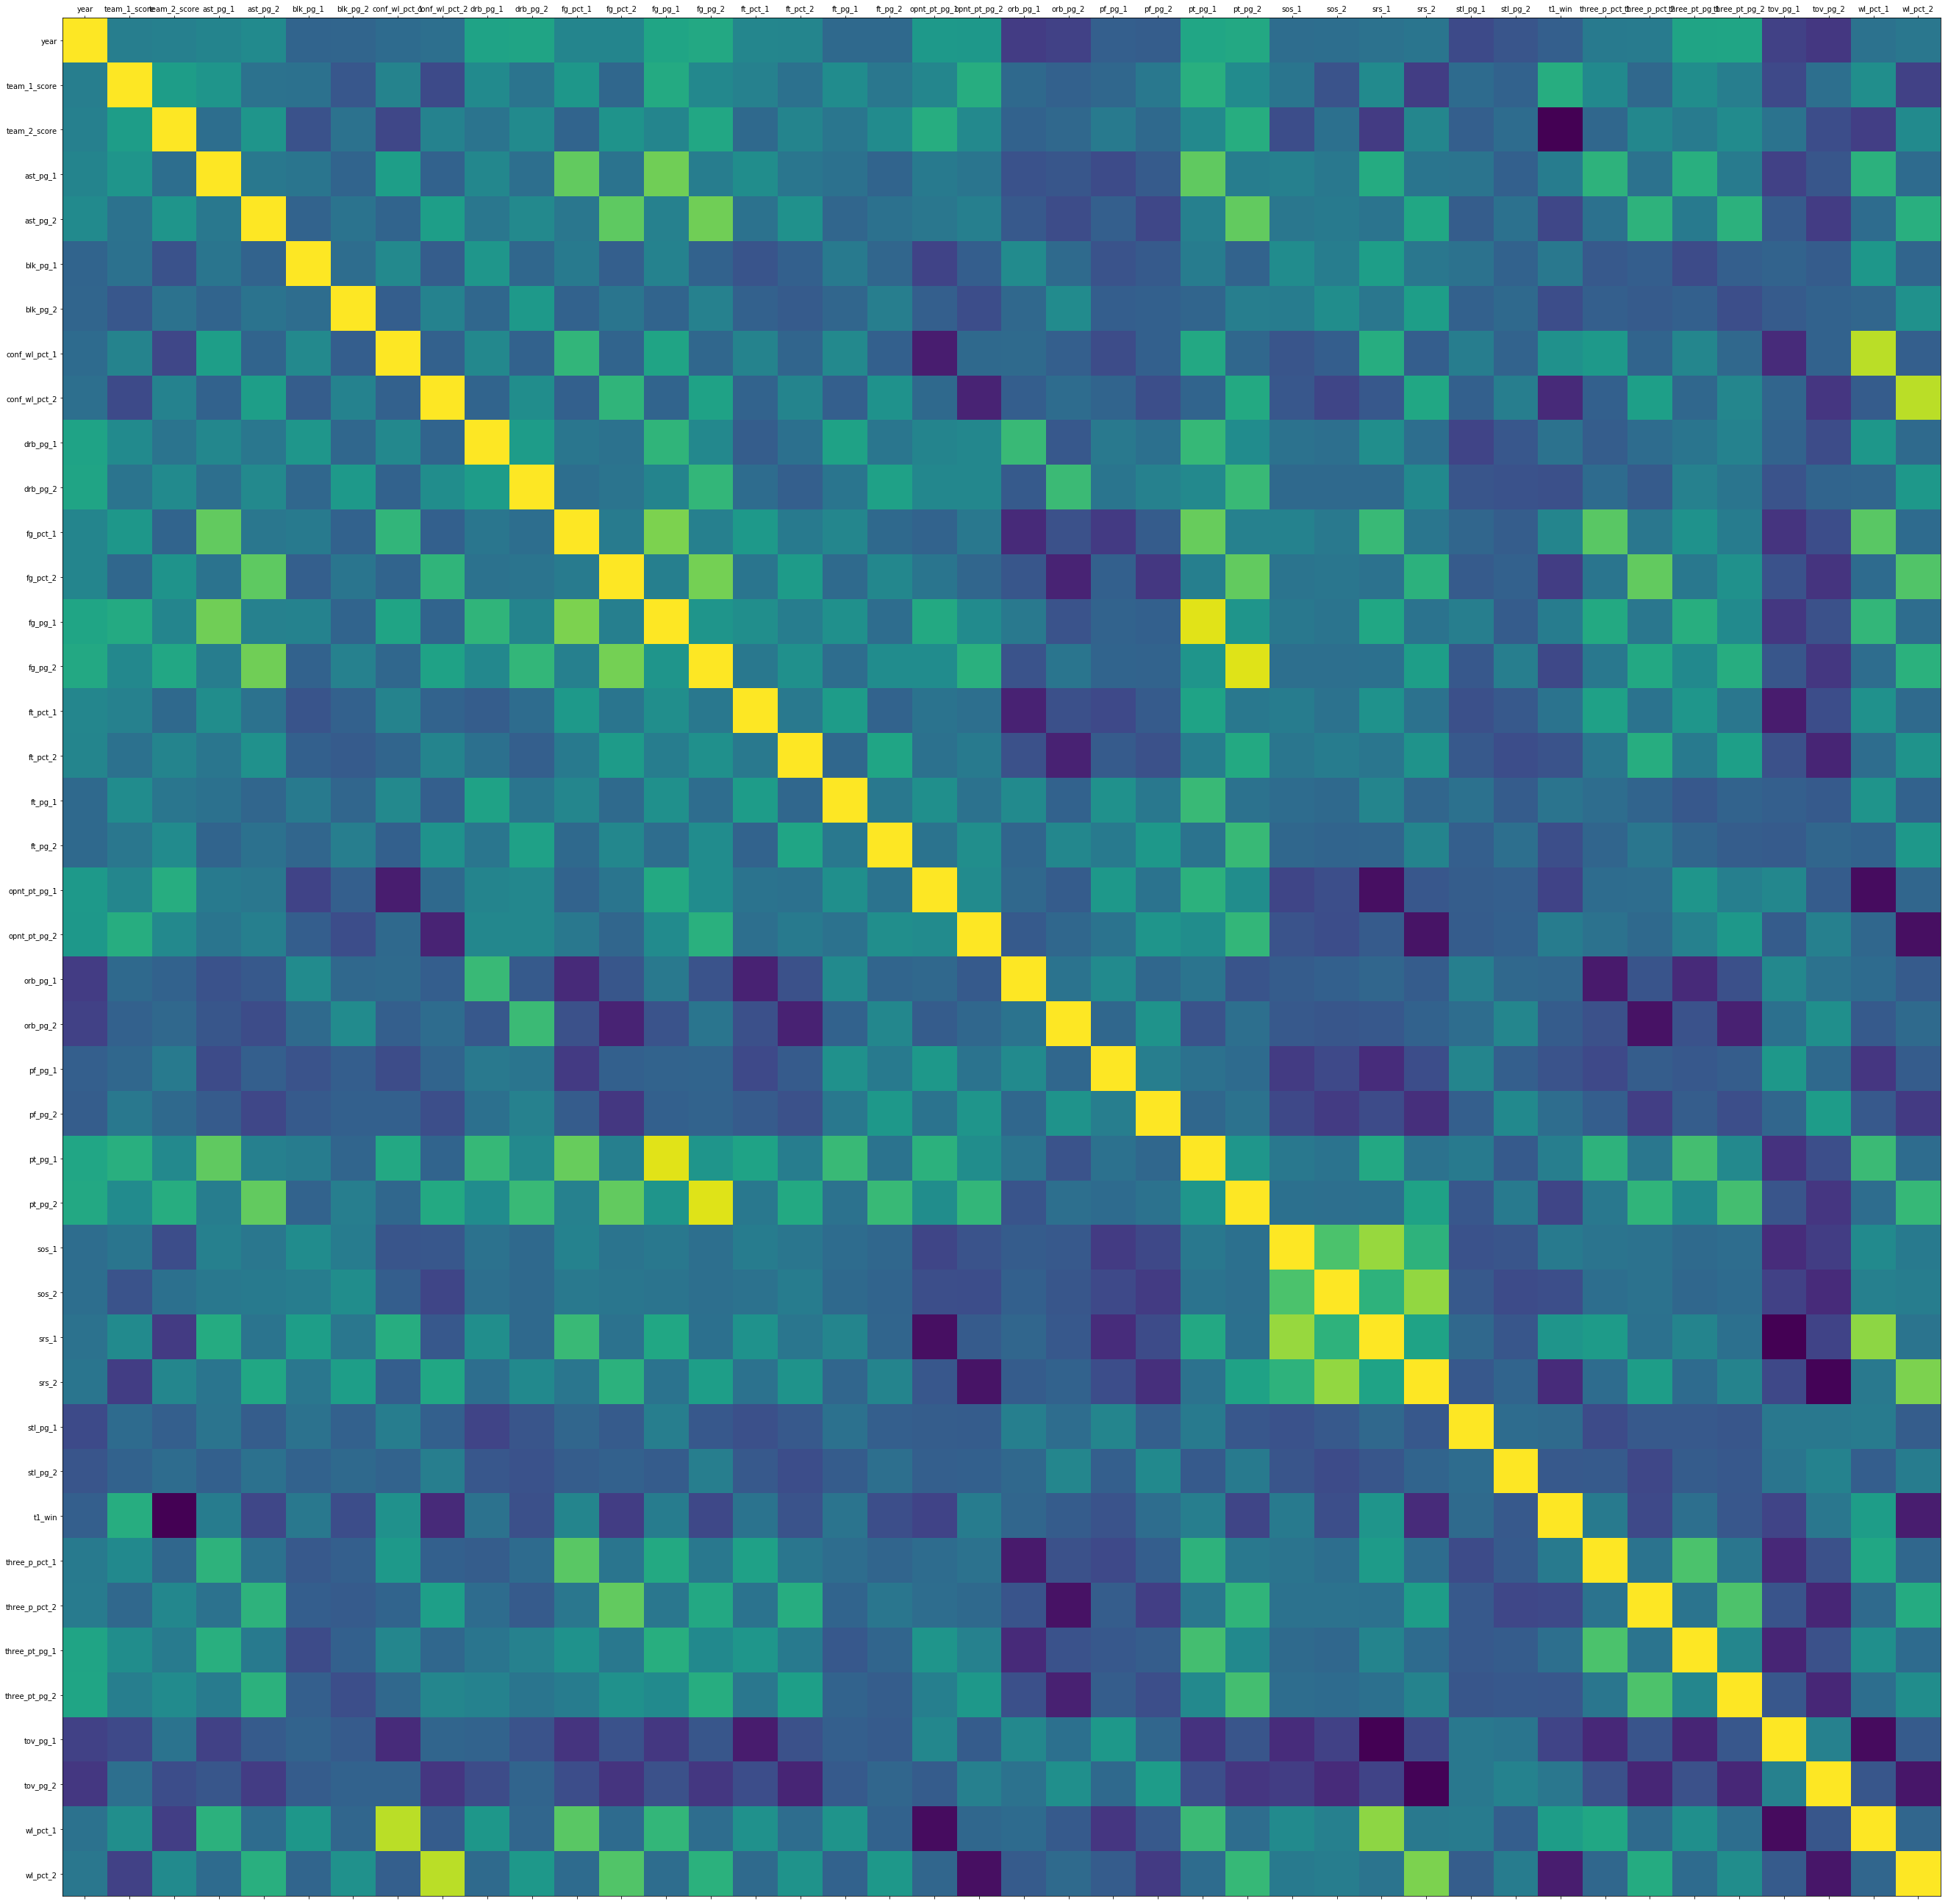

In [39]:
def plot_corr(df, size=47):
    """
    Function plots graphical correlation matric for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    Displays:
        matrix of correlation between columns. (blue->red)
                                                0----->1
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks
plot_corr(game_w_team_stats)
#TODO manage correlations

## Check true/false ratio

In [44]:
t1_win_map = {True:1, False:0}
game_w_team_stats['t1_win'] = game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(game_w_team_stats.loc[game_w_team_stats['t1_win'] == True])
num_false = len(game_w_team_stats.loc[game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 14164 (47.77%)
Number of False cases: 15487 (52.23%)


In [46]:
from sklearn.cross_validation import train_test_split
feature_col_names = ['fg_pg_1','ft_pg_1',
            'three_pt_pg_1','orb_pg_1','drb_pg_1',
            'ast_pg_1','stl_pg_1','blk_pg_1',
            'tov_pg_1','pf_pg_1', 'pt_pg_1',
            'opnt_pt_pg_1','fg_pct_1','three_p_pct_1',
            'ft_pct_1','wl_pct_1','conf_wl_pct_1',
            'srs_1','sos_1',
            'fg_pg_2','ft_pg_2',
            'three_pt_pg_2','orb_pg_2','drb_pg_2',
            'ast_pg_2','stl_pg_2','blk_pg_2',
            'tov_pg_2','pf_pg_2', 'pt_pg_2',
            'opnt_pt_pg_2','fg_pct_2','three_p_pct_2',
            'ft_pct_2','wl_pct_2','conf_wl_pct_2',
            'srs_2','sos_2'
            ]
predicted_class_names = ['t1_win']
x = game_w_team_stats[feature_col_names].values
y = game_w_team_stats[predicted_class_names].values
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
print("{0:0.2f}% in training set".format((len(x_train)/len(game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(game_w_team_stats.index))*100))

70.00% in training set
30.00% in test set


## Impute with the mean

In [50]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initial Algorith - Naive Bayes


In [51]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [52]:
nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7009


### Metrics

In [53]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1, 0]))

Confusion Matrix
[[2962 1299]
 [1362 3273]]

Classification Report
             precision    recall  f1-score   support

          1       0.69      0.70      0.69      4261
          0       0.72      0.71      0.71      4635

avg / total       0.70      0.70      0.70      8896



## Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
rf_predict_test = rf_model.predict(x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.6512


## Let us improve the accurracy using logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)
# training metrics
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: {0:.4f} 0.732351618705036
[[3035 1226]
 [1155 3480]]

Classification Report
             precision    recall  f1-score   support

          1       0.72      0.71      0.72      4261
          0       0.74      0.75      0.75      4635

avg / total       0.73      0.73      0.73      8896



## Setting regularization parameters

1st max valu of 0.714 occured at C=3.500


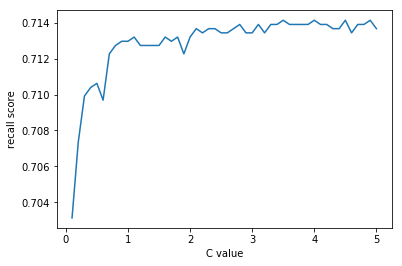

In [57]:
C_start = 0.1
C_end = 5
C_inc = 0.1
 
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [60]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)


print("Accuracy: {0:.4f}",format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: {0:.4f} 0.7330260791366906
[[3135 1126]
 [1249 3386]]

Classification Report
             precision    recall  f1-score   support

          1       0.72      0.74      0.73      4261
          0       0.75      0.73      0.74      4635

avg / total       0.73      0.73      0.73      8896

0.735742783384


## Logistic Regression CV (Cross Validation)

In [61]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [62]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy 0.7230
[[3089 1172]
 [1292 3343]]

Classification Report
             precision    recall  f1-score   support

          1       0.71      0.72      0.71      4261
          0       0.74      0.72      0.73      4635

avg / total       0.72      0.72      0.72      8896



In [66]:
print(type(x_test))
print(type(lr_cv_predict_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
